## Customer Churn Prediction - Telco




## 1.0 Business Understanding
### 1.1 Introduction
Customer churn  is a significant problem in the telecom industry as it results in reduced profit margin and negatively impacting long-term sustainability. 
Churn, which refers to customers discontinuing their service and moving to a competitor, can be driven by various factors such as charges, customer service quality, network coverage, and the competitiveness of offerings. The implications of high churn rates are multifaceted:

- Reduced Profit Margin: Acquiring new customers often costs more than retaining existing ones due to marketing expenses, promotional offers, and the operational costs of setting up new accounts. When customers leave, the company not only loses the revenue these customers would have generated but also the investment made in acquiring them.

- Investment Recovery: Telecommunications companies make significant upfront investments in infrastructure and customer acquisition. Customer longevity is crucial for recovering these investments. High churn rates shorten the average customer lifespan, jeopardizing the return on these investments.

- Brand Reputation: High churn rates can signal dissatisfaction, potentially damaging the company's reputation. This perception can make it more challenging to attract new customers and retain existing ones.

- Operational Efficiency: High churn rates can lead to inefficiencies in resource allocation and operations. Companies may find themselves in a constant cycle of trying to replace lost customers, diverting resources from improving services and innovating.

In the rapidly evolving commercial landscape, organizations continuously strive to carve out a competitive edge—profit maximization and customer loyalty being the twin pillars of sustainable growth. Advanced analytics and machine learning now stand at the forefront of this quest, transforming raw data into a strategic asset. Among these technologies, churn analysis classification models exemplify a critical tool in the modern business arsenal, offering not just insights but actionable foresight.

Classification in machine learning and statistics entails a supervised learning approach where the computer program learns from provided data to make new observations or classifications. The primary objective is to determine the class or category into which new data points will fall. In this project, an elaborate analysis will be conducted to train at least seven models for predicting customer churn in a telecom company. This analysis will adhere to the **CRISP-DM framework**, ensuring a structured and systematic approach to model development and evaluation.

In conclusion, as companies navigate the complexities of the modern market, the use of machine learning in churn analysis emerges not just as a technical enhancement, but as a fundamental component of a robust strategic framework aimed at nurturing customer loyalty and driving financial performance. The forward-thinking enterprises that can best harness these capabilities will likely lead the pack in realizing the twin goals of enhanced profitability and sustained customer engagement.

### 1.2 Project Objective
The primary objective of this project is to develop a classification model for churn analysis to aid in customer retention efforts. Churn analysis focuses on predicting whether customers are likely to leave or continue their relationship with the company. By identifying customers at risk of churning, the company can take proactive measures to retain them, thus increasing revenue and profit margins.

### 1.3 Data Description
The project will utilize historical data encompassing various customer attributes, transactional details, and behavioral patterns. These may include demographic information, purchase history, engagement metrics, customer service interactions, and any other relevant data points. The dataset will be sufficiently large and diverse to capture the complexities of customer behavior across different segments.

### 1.4 Methodology
The project will employ a supervised learning approach, specifically classification algorithms, to train predictive models. These models will learn from past instances of churn and non-churn events to classify new customers accordingly. Various classification algorithms such as logistic regression, decision trees, random forests, and gradient boosting will be explored to identify the most effective model for the given dataset.

### 1.5 Key Deliverables
1. Churn Prediction Model: A robust machine learning model capable of accurately predicting customer churn based on input features.
2. Feature Importance Analysis: Identification of the most influential factors driving churn, providing actionable insights for targeted retention strategies.
3. Model Evaluation: Rigorous evaluation of model performance using appropriate metrics such as accuracy, precision, recall, and F1-score. The model will be validated using techniques like cross-validation and holdout validation to ensure generalizability.
4. Deployment Strategy: Recommendations for integrating the churn prediction model into the company's existing systems or workflows for real-time monitoring and intervention.

### 1.6 Key Deliverables
By leveraging the insights gained from the churn analysis model, the company expects to:
- Proactively identify customers at risk of churn.
- Tailor retention strategies and incentives to address specific customer needs and pain points.
- Optimize resource allocation by focusing retention efforts on high-value customers with the highest churn propensity.
- Ultimately, improve overall customer retention rates, thereby enhancing long-term profitability and competitiveness in the market.


### 1.7 Hypothesis
**Hypothesis 1**

`Null Hypothesis (Ho):` There is no significant difference in churn rates between customers with shorter and longer tenure.

`Alternative Hypothesis (Ha):` There is a significant difference in churn rates between customers with shorter and longer tenure.

**Hypothesis 2**

`Null Hypothesis (Ho):` There is no significant difference in churn rates between customers with higher and lower monthly charge.

`Alternative Hypothesis (Ha):` There is a significant difference in churn rates between customers with higher and lower monthly charge.

### 1.8 Business Questions
1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. How does the presence of multiple lines affect customer churn?
4. Is there a correlation between the contract term (Contract) and customer churn?
5. What are the common payment methods (Payment Method) among customers who churned?
6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
8. Is there a difference in churn rates between senior citizens and non-senior citizens?
9. How does the total amount charged to customers (TotalCharges) correlate with churn behavior?
10. How does the contract affect churn rates?

#### NB:
This notebook embrases plotly's philosophy for visualizations and implicitly carries the limitation of no native in power BI and no renderings on github. Kindly, run the notebook to see the visualizations. Screenshots and PDF is also attached for convenience.



## 2.0 Data Understanding 🔍


#### 2.1 Prerequisites

- Doing necessary installations

In [1]:
# Install necessary packages in quiet mode

%pip install --quiet pandas matplotlib seaborn plotly pyodbc python-dotenv scikit-learn imbalanced-learn catboost lightgbm xgboost  

Note: you may need to restart the kernel to use updated packages.


- Import needed packages

In [243]:
# Environmental variables
from dotenv import dotenv_values 

# Microsoft Open Database Connectivity (ODBC) library
import pyodbc 

# Data handling
import numpy as np
import pandas as pd 

# Regular expression                   
import re 

# Type hinting
from typing import Callable, Dict, ValuesView, List, Any, Union

# Get signature of a function
import inspect
               
# Visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Statistical tests
from scipy.stats import kruskal, mannwhitneyu, fisher_exact, chi2_contingency
from itertools import combinations

# PCA 
from sklearn.decomposition import PCA

# Feature Processing
from imblearn.over_sampling import SMOTE # Balance class distribution
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2  # Univariate Selection using KBest
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# Feature importances and explainer
import shap

# Evaluation - Cross Validation & Hyperparameters Fine-tuning 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# Set pandas to display all columns
pd.set_option("display.max_columns", None)

# Suppress the scientific notation
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Disable warnings               
import warnings
warnings.filterwarnings('ignore')

# Other packages
import os, pickle

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


### 2.2 Data reading




In [3]:
BASE_DIR = '../'
ENV_FILE = os.path.join(BASE_DIR, '.env')
SECOND_FILE = os.path.join(BASE_DIR, 'data/untouched/LP2_Telco-churn-second-2000.csv')
TEST_FILE = os.path.join(BASE_DIR, 'data/untouched/Telco-churn-last-2000.xlsx')
TRAIN_FILE = os.path.join(BASE_DIR, 'data/untouched/df_train.csv')
TRAIN_FILE_CLEANED = os.path.join(BASE_DIR, 'data/cleaned/df_train.csv')


#### 2.2.1 First Data Set
The first data was from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. <br>
The database contains the first 3000 records of the dataset<br>

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values(ENV_FILE)

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
table = environment_variables.get("TABLE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete.
# Check your internet connection if it takes more time than necessary
connection = pyodbc.connect(connection_string)

In [6]:
# Select the all rows from database table
query = f"SELECT * FROM {table}"

first_dataset = pd.read_sql(query, connection)

In [7]:
first_dataset.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female          False     True       False       1   
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0         False          None             DSL          False         True   
1          True         False             DSL           True        False   
2          True         False             DSL           True         True   
3         False          None             DSL           True        False   
4          True         False     Fiber optic          False        False   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   
1             True       False       False           False        One year   
2            False       False       False           False  Month-to-month   
3             True        True       False           False        One year   
4            False       False       False           False  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              True           Electronic check           29.85         29.85   
1             False               Mailed check           56.95       1889.50   
2              True               Mailed check           53.85        108.15   
3             False  Bank transfer (automatic)           42.30       1840.75   
4              True           Electronic check           70.70        151.65   

   Churn  
0  False  
1  False  
2   True  
3  False  
4   True

In [8]:
first_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
first_dataset.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [10]:
first_dataset.shape

(3000, 21)

#### 2.2.2 Second Data Set

- The second part of the data is hosted on this [GitHub Repository](https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/tree/main) in a file called [LP2_Telco-churn-second-2000.csv](https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv). 

In [11]:
# Load dataset

url = 'https://github.com/D0nG4667/telco_customer_churn_prediction/blob/main/data/untouched/LP2_Telco-churn-second-2000.csv'

# Read the csv file
try:
    second_dataset = pd.read_csv(url)
except Exception as e:
    second_dataset = pd.read_csv(SECOND_FILE)




In [12]:
second_dataset.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5600-PDUJF    Male              0      No         No       6          Yes   
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                No             DSL             No           No   
1                No             DSL             No           No   
2  No phone service             DSL            Yes           No   
3               Yes     Fiber optic             No           No   
4               Yes     Fiber optic             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes          No              No  Month-to-month   
1              Yes         Yes          No              No  Month-to-month   
2              Yes          No          No             Yes        Two year   
3               No          No          No              No  Month-to-month   
4              Yes         Yes         Yes             Yes  Month-to-month   

  PaperlessBilling            PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Credit card (automatic)           49.50        312.7    No  
1              Yes  Credit card (automatic)           55.00       1046.5   Yes  
2              Yes  Credit card (automatic)           43.95       2960.1    No  
3              Yes         Electronic check           74.35        834.2   Yes  
4              Yes         Electronic check          111.15       6953.4    No

In [13]:
second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [14]:
second_dataset.shape

(2043, 21)

#### 2.2.3 Testing Data Set

- The final 2000 records of the data set needed for this project can be found in this [OneDrive](https://azubiafrica-my.sharepoint.com/:f:/g/personal/teachops_azubiafrica_org/EnSl-bZ6lyNJsy6nLuOVcigB28t8r9YFEEquv_CJMgkm9w?e=kxD5m1). 

- The file is named [Telco-churn-last-2000.xlsx](https://azubiafrica-my.sharepoint.com/:x:/r/personal/teachops_azubiafrica_org/_layouts/15/Doc.aspx?sourcedoc=%7B4BFB3536-A4A1-43C9-8F4F-79741606114C%7D&file=Telco-churn-last-2000.xlsx&action=default&mobileredirect=true). 

- This is the test dataset. This Dataset will be used for testing the accuracy of your models. 

In [15]:
url = 'https://github.com/D0nG4667/telco_customer_churn_prediction/raw/main/data/untouched/Telco-churn-last-2000.xlsx'

# Read the excel file
try:
    df_test = pd.read_excel(url)
except Exception as e:
    df_test = pd.read_excel(TEST_FILE)



In [16]:
df_test.head()

customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7613-LLQFO   Male              0      No         No      12          Yes   
1  4568-TTZRT   Male              0      No         No       9          Yes   
2  9513-DXHDA   Male              0      No         No      27          Yes   
3  2640-PMGFL   Male              0      No        Yes      27          Yes   
4  3801-HMYNL   Male              0     Yes        Yes       1          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes     Fiber optic                   No                   No   
1            No              No  No internet service  No internet service   
2            No             DSL                  Yes                   No   
3           Yes     Fiber optic                   No                   No   
4            No     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                  Yes   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0                   No  Month-to-month              Yes  Electronic check   
1  No internet service  Month-to-month               No      Mailed check   
2                  Yes        One year               No  Electronic check   
3                   No  Month-to-month              Yes  Electronic check   
4                  Yes  Month-to-month               No      Mailed check   

   MonthlyCharges TotalCharges  
0           84.45      1059.55  
1           20.40       181.80  
2           81.70      2212.55  
3           79.50      2180.55  
4           89.15        89.15

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [18]:
df_test.shape

(2000, 20)

#### 2.2.4 Train Data Set

- Create the train concatenated dataset 
- Concatenate first_dataset and second_dataset

In [19]:
# Checking if the first and second Dataset have the same column names for easy concatenation

if all(first_dataset.columns == second_dataset.columns):
    print("The DataFrames have the same column names.")
else:
    print("The DataFrames do not have the same column names.")

The DataFrames have the same column names.


In [20]:
# Train Data set
df_train = pd.concat([first_dataset, second_dataset], ignore_index=True)

### 2.2.5 Data Dictionary

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


The following describes the columns present in the dataset for this project.

- **Gender**: Whether the customer is a male or a female

- **SeniorCitizen**: Whether a customer is a senior citizen or not

- **Partner**: Whether the customer has a partner or not (Yes, No)

- **Dependents**: Whether the customer has dependents or not (Yes, No)

- **Tenure**: Number of months the customer has stayed with the company

- **Phone Service**: Whether the customer has a phone service or not (Yes, No)

- **MultipleLines**: Whether the customer has multiple lines or not

- **InternetService**: Customer's internet service provider (DSL, Fiber Optic, No)

- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No Internet)

- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No Internet)

- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)

- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet)

- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)

- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No Internet service)

- **Contract**: The contract term of the customer (Month-to-Month, One year, Two year)

- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)

- **Payment Method**: The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- **MonthlyCharges**: The amount charged to the customer monthly

- **TotalCharges**: The total amount charged to the customer

- **Churn**: Whether the customer churned or not (Yes or No)




### 2.3 Verify Data Quality


In [22]:
# Save the DataFrame to a CSV file
try:
    df_train.to_csv(TRAIN_FILE, index=False)
except Exception as e:
    print(e)    
    

In [23]:
df_train.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0    True      False       1        False   
1  5575-GNVDE    Male              0   False      False      34         True   
2  3668-QPYBK    Male              0   False      False       2         True   
3  7795-CFOCW    Male              0   False      False      45        False   
4  9237-HQITU  Female              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0          None             DSL          False         True            False   
1         False             DSL           True        False             True   
2         False             DSL           True         True            False   
3          None             DSL           True        False             True   
4         False     Fiber optic          False        False            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   
3        True       False           False        One year            False   
4       False       False           False  Month-to-month             True   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  
0           Electronic check           29.85        29.85  False  
1               Mailed check           56.95      1889.50  False  
2               Mailed check           53.85       108.15   True  
3  Bank transfer (automatic)           42.30      1840.75  False  
4           Electronic check           70.70       151.65   True

### 2.3.1  Missing values in columns


In [24]:
df_train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

#### Key Findings:
1. **Missing Data:**
   - The dataset contains missing values in several columns: `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `TotalCharges`, and `Churn`. 
      - `MultipleLines`: 269 missing values
      - `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`: 651 missing values each
      - `TotalCharges`: 5 missing values
      - `Churn`: 1 missing value
   - Addressing these missing values is crucial to ensure the accuracy and reliability of subsequent analyses.

2. **Service Subscriptions:**
   - A significant number of customers have missing values for additional services such as `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`. This suggests potential issues with data collection or customer preferences.
   - Further investigation into the reasons for missing data in these columns is recommended to understand if it is due to customers not opting for these services or data recording errors.

3. **Churn Rate:**
   - The `Churn` column contains one missing value, indicating that one customer's churn status is not recorded. Accurate recording of churn status is essential for evaluating customer retention strategies and predicting future churn.

4. **Numerical features - Tenure, Monthly Charges and TotalCharges:**
   - `Tenure` and `MonthlyCharges` exhibit no missing values, indicating complete data for these important variables.
   - However, there are five missing values in the `TotalCharges` column, which should be addressed to maintain data integrity.   
   - These numerical features are not on the same scale.  

#### Recommendations:
1. **Data Imputation and Scaling:**
   - Employ appropriate techniques such as mean or median or mode imputation to address missing values in the dataset, particularly in columns related to service subscriptions (`MultipleLines`, `OnlineSecurity`, etc.) and churn status (`Churn`). Condsider dropping rows containing missing values Churn value.
   - Validate imputation methods to ensure they do not introduce bias or distort the underlying patterns in the data.
   - Scale the numerical feautures using Robust Scaling so that outliers in `TotalCharges` do not unduly influence the scaling process.

2. **Data Quality Assurance:**
   - Conduct a thorough review of data collection processes to identify and rectify issues leading to missing values.
   - Implement robust mechanisms for recording and validating customer data to minimize future instances of missing or erroneous data.

3. **Churn Analysis:**
   - Analyze churn patterns and factors influencing churn, such as tenure, service subscriptions, and billing information, to develop targeted retention strategies.
   - Utilize predictive modeling techniques to forecast future churn and proactively implement measures to mitigate it.

4. **Customer Segmentation:**
   - Segment customers based on demographic characteristics, service subscriptions, and tenure to tailor marketing efforts and service offerings to specific customer needs and preferences.
   - Personalize communication and incentives to enhance customer engagement and loyalty.

#### Assumptions: 
1. **`MultipleLines`** Implies multiple phone services

2. No **`InternetService`** implies No `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` 
 


### 2.3.2 Train Dataset Info


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


#### Dataset Description:
- **Total Entries:** 5043
- **Data Columns:** 21
- **Data Types:**
  - Object: 18 columns
  - Integer: 2 columns
  - Float: 1 column

#### Key Observations:
1. **Categorical Variables:**
   - Majority of the columns are categorical, representing customer attributes such as gender, partner status, dependents, phone service, internet service, contract type, paperless billing, payment method, and churn status.

2. **Numerical Variables:**
   - `Tenure`: Represents the duration of the customer's subscription tenure.
   - `MonthlyCharges`: Indicates the monthly charges incurred by the customer.
   - `TotalCharges`: Represents the total charges incurred by the customer. It is noteworthy that this column is currently classified as an object datatype, which may require conversion for accurate numerical analysis.

#### Recommendations:
1. **Data Cleaning:**
   - Address missing values by employing appropriate imputation techniques tailored to each column's characteristics.
   - Convert the `TotalCharges` column to a numerical datatype (float64) for accurate numerical analysis.

2. **Exploratory Data Analysis (EDA):**
   - Conduct thorough exploratory analysis to understand the distribution of categorical variables, identify trends, and unveil potential relationships between variables.
   - Explore the impact of demographic factors, service subscriptions, and billing information on churn rate to derive actionable insights for retention strategies.

3. **Feature Engineering:**
   - Engineer new features or derive meaningful insights from existing ones to enhance model performance and predictive accuracy.
   - Consider creating aggregate metrics or customer segmentation based on usage patterns or tenure to refine predictive models.


### 2.3.3 Unique Values Summary


In [26]:
def unique_value_summary(df):
    """
    Generate a summary table of unique values for each column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame
    
    Returns:
    - summary_df: pandas DataFrame containing the summary
    """
    # Initialize a list to store our summaries
    unique_values_summary = []

    # Iterate over each column in the DataFrame
    for column in df.columns:
        unique_values = df[column].unique()  # Get unique values for the column
        unique_count = len(unique_values)    # Count of unique values

        # Append the summary to our list
        unique_values_summary.append({
            'Column': column,
            'Unique Values Count': unique_count,
            'Unique Values': unique_values
        })

    # Convert the summaries list to a DataFrame for better readability
    summary_df = pd.DataFrame(unique_values_summary)
    
    return summary_df


In [27]:
# Set display option for max column width to 100
pd.set_option('display.max_colwidth', 100)

# Check the unique value across columns
unique_value_summary(df_train)

Column  Unique Values Count  \
0         customerID                 5043   
1             gender                    2   
2      SeniorCitizen                    2   
3            Partner                    4   
4         Dependents                    4   
5             tenure                   73   
6       PhoneService                    4   
7      MultipleLines                    6   
8    InternetService                    3   
9     OnlineSecurity                    6   
10      OnlineBackup                    6   
11  DeviceProtection                    6   
12       TechSupport                    6   
13       StreamingTV                    6   
14   StreamingMovies                    6   
15          Contract                    3   
16  PaperlessBilling                    4   
17     PaymentMethod                    4   
18    MonthlyCharges                 2069   
19      TotalCharges                 4885   
20             Churn                    5   

                                                                                          Unique Values  
0   [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC,...  
1                                                                                        [Female, Male]  
2                                                                                                [0, 1]  
3                                                                                [True, False, No, Yes]  
4                                                                                [False, True, No, Yes]  
5   [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5,...  
6                                                                                [False, True, Yes, No]  
7                                                        [None, False, True, No, No phone service, Yes]  
8                                                                                [DSL, Fiber optic, No]  
9                                                     [False, True, None, No, Yes, No internet service]  
10                                                    [True, False, None, No, Yes, No internet service]  
11                                                    [False, True, None, No, Yes, No internet service]  
12                                                    [False, True, None, Yes, No, No internet service]  
13                                                    [False, True, None, No, Yes, No internet service]  
14                                                    [False, True, None, No, Yes, No internet service]  
15                                                                 [Month-to-month, One year, Two year]  
16                                                                               [True, False, Yes, No]  
17                 [Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)]  
18  [29.850000381469727, 56.95000076293945, 53.849998474121094, 42.29999923706055, 70.69999694824219...  
19  [29.850000381469727, 1889.5, 108.1500015258789, 1840.75, 151.64999389648438, 820.5, 1949.4000244...  
20                                                                         [False, True, None, No, Yes]

In [28]:
# Set display option for max column width back to default 50
pd.set_option('display.max_colwidth', 50)

#### Key Observations:
1. **CustomerID:**
   - There are 5043 unique customer IDs present in the dataset.
   - Values are not relevant

2. **Gender:**
   - Two unique values are observed: "Female" and "Male".

3. **SeniorCitizen:**
   - Two unique values are observed: 0 and 1, representing whether a customer is a senior citizen or not.

4. **Partner:**
   - Four unique values are observed: "True", "False", "No", and "Yes".

5. **Dependents:**
   - Four unique values are observed: "False", "True", "No", and "Yes".

6. **Tenure:**
   - There are 73 unique values observed, representing the duration of customer tenure in months.

7. **PhoneService:**
   - Four unique values are observed: "False", "True", "Yes", and "No".

8. **MultipleLines:**
   - Six unique values are observed, including "None", "False", "True", "No", "No phone service", and "Yes".

9. **InternetService:**
   - Three unique values are observed: "DSL", "Fiber optic", and "No".

10. **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies:**
    - Each of these columns exhibits six unique values, including "False", "True", "None", "No", "Yes", and "No internet service".

11. **Contract:**
    - Three unique values are observed: "Month-to-month", "One year", and "Two year".

12. **PaperlessBilling:**
    - Four unique values are observed: "True", "False", "Yes", and "No".

13. **PaymentMethod:**
    - Four unique values are observed: "Electronic check", "Mailed check", "Bank transfer (automatic)", and "Credit card (automatic)".

14. **MonthlyCharges:**
    - There are 2069 unique values observed, representing the monthly charges incurred by customers.

15. **TotalCharges:**
    - There are 4885 unique values observed for total charges incurred by customers.

16. **Churn:**
    - Five unique values are observed: "False", "True", "None", "No", and "Yes".

#### Recommendations:
- Drop the `CustomerID` column.
- The count of unique values tend to be highest in numerical columns.
- Standardize the unique values of categorical columns to allow for consistency by casting to "Yes" or "No" where implied. Therefore, False, 0, "No phone service" and "No internet service" becomes "No", while True and 1 becomes "Yes".
- "None" values are actually missing or null values so replace NULL with pd.NA  
- Consider visualization techniques such as histograms, bar plots, or box plots to gain deeper insights into the distribution of categorical and numerical variables.


### 2.4 Cleaning🧹

#### 2.4.1 Handle Duplicates

- Check duplicates in train dataset

In [29]:
count_duplicates = df_train.duplicated().sum()

print(f'There are {count_duplicates} duplicates in the dataset.')

There are 0 duplicates in the dataset.


- Drop duplicated from train dataset

In [30]:
# Drop duplicated from train dataset
if count_duplicates > 0 : 
    df_train.drop_duplicates(inplace=True)

#### 2.4.2 Standardize Column Names

- Use snake case
    - Insert underscores at the boundary between a lowercase letter followed by an uppercase letter, excluding consecutive capital letters thereby converting a camel case string into snake case.


In [31]:
# Regular expression to split by capital letters without consecutive capitals:
# (?<!^)(?=[A-Z][a-z]) - Matches boundary between uppercase letter and lowercase letter.
# | - Alternation operator.
# (?<=[a-z])(?=[A-Z]) - Matches boundary between lowercase letter and uppercase letter.

pattern = r'(?<!^)(?=[A-Z][a-z])|(?<=[a-z])(?=[A-Z])'

df_train.columns = [re.sub(pattern, '_', column).lower() for column in df_train.columns] # Train

df_test.columns = [re.sub(pattern, '_', column).lower() for column in df_test.columns] # Test

In [32]:
df_train

customer_id  gender  senior_citizen partner dependents  tenure  \
0     7590-VHVEG  Female               0    True      False       1   
1     5575-GNVDE    Male               0   False      False      34   
2     3668-QPYBK    Male               0   False      False       2   
3     7795-CFOCW    Male               0   False      False      45   
4     9237-HQITU  Female               0   False      False       2   
...          ...     ...             ...     ...        ...     ...   
5038  6840-RESVB    Male               0     Yes        Yes      24   
5039  2234-XADUH  Female               0     Yes        Yes      72   
5040  4801-JZAZL  Female               0     Yes        Yes      11   
5041  8361-LTMKD    Male               1     Yes         No       4   
5042  3186-AJIEK    Male               0      No         No      66   

     phone_service    multiple_lines internet_service online_security  \
0            False              None              DSL           False   
1             True             False              DSL            True   
2             True             False              DSL            True   
3            False              None              DSL            True   
4             True             False      Fiber optic           False   
...            ...               ...              ...             ...   
5038           Yes               Yes              DSL             Yes   
5039           Yes               Yes      Fiber optic              No   
5040            No  No phone service              DSL             Yes   
5041           Yes               Yes      Fiber optic              No   
5042           Yes                No      Fiber optic             Yes   

     online_backup device_protection tech_support streaming_tv  \
0             True             False        False        False   
1            False              True        False        False   
2             True             False        False        False   
3            False              True         True        False   
4            False             False        False        False   
...            ...               ...          ...          ...   
5038            No               Yes          Yes          Yes   
5039           Yes               Yes           No          Yes   
5040            No                No           No           No   
5041            No                No           No           No   
5042            No               Yes          Yes          Yes   

     streaming_movies        contract paperless_billing  \
0               False  Month-to-month              True   
1               False        One year             False   
2               False  Month-to-month              True   
3               False        One year             False   
4               False  Month-to-month              True   
...               ...             ...               ...   
5038              Yes        One year               Yes   
5039              Yes        One year               Yes   
5040               No  Month-to-month               Yes   
5041               No  Month-to-month               Yes   
5042              Yes        Two year               Yes   

                 payment_method  monthly_charges total_charges  churn  
0              Electronic check            29.85         29.85  False  
1                  Mailed check            56.95       1889.50  False  
2                  Mailed check            53.85        108.15   True  
3     Bank transfer (automatic)            42.30       1840.75  False  
4              Electronic check            70.70        151.65   True  
...                         ...              ...           ...    ...  
5038               Mailed check            84.80        1990.5     No  
5039    Credit card (automatic)           103.20        7362.9     No  
5040           Electronic check            29.60        346.45     No  
5041               Mailed check            74.40     

#### 2.4.3 Drop `customer_id` column

In [33]:
try:
    df_train.drop(columns='customer_id', inplace=True)
    df_test.drop(columns='customer_id', inplace=True)
except Exception as e:
    print(e)    

In [34]:
df_train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

#### 2.4.4 Fix inconsistent representation of missing values

In [35]:
df_train.isna().sum()

gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          5
churn                  1
dtype: int64

- Replace 'None' string values or NULL with pd.NA NaN element-wise allowing for consistent representation of missing values

In [36]:
# Function replace None with Pandas NaN
def replace_none(value):
    like_nan = {'none', ''}
    if pd.isnull(value) or (isinstance(value, str) and (value.lower().strip() in like_nan)):
        value = pd.NA
    
    return value

# Apply the function to all columns
df_train = df_train.applymap(replace_none) # element-wise

In [37]:
df_train.isna().sum()

gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          8
churn                  1
dtype: int64

- `total_charges` column now has 3 more correctly identified missing values that were initial empty strings.

#### 2.4.5 Fix Datatypes


- Check dataset info

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5043 non-null   object 
 1   senior_citizen     5043 non-null   int64  
 2   partner            5043 non-null   object 
 3   dependents         5043 non-null   object 
 4   tenure             5043 non-null   int64  
 5   phone_service      5043 non-null   object 
 6   multiple_lines     4774 non-null   object 
 7   internet_service   5043 non-null   object 
 8   online_security    4392 non-null   object 
 9   online_backup      4392 non-null   object 
 10  device_protection  4392 non-null   object 
 11  tech_support       4392 non-null   object 
 12  streaming_tv       4392 non-null   object 
 13  streaming_movies   4392 non-null   object 
 14  contract           5043 non-null   object 
 15  paperless_billing  5043 non-null   object 
 16  payment_method     5043 

- Convert the `total_charges` column to a numerical datatype (Float64) for accurate numerical analysis.

In [39]:
# The 'total_charges' column datatype should be numerical float handling missing values gracefuly with Float64
df_train['total_charges'] = pd.to_numeric(df_train['total_charges'], errors = 'coerce')

df_test['total_charges'] = pd.to_numeric(df_test['total_charges'], errors = 'coerce')

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5043 non-null   object 
 1   senior_citizen     5043 non-null   int64  
 2   partner            5043 non-null   object 
 3   dependents         5043 non-null   object 
 4   tenure             5043 non-null   int64  
 5   phone_service      5043 non-null   object 
 6   multiple_lines     4774 non-null   object 
 7   internet_service   5043 non-null   object 
 8   online_security    4392 non-null   object 
 9   online_backup      4392 non-null   object 
 10  device_protection  4392 non-null   object 
 11  tech_support       4392 non-null   object 
 12  streaming_tv       4392 non-null   object 
 13  streaming_movies   4392 non-null   object 
 14  contract           5043 non-null   object 
 15  paperless_billing  5043 non-null   object 
 16  payment_method     5043 

- Convert the `senior_citizen` column to a string datatype (str).

In [41]:
df_train['senior_citizen'] = df_train.senior_citizen.astype(str)

- Check the dataset info again

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5043 non-null   object 
 1   senior_citizen     5043 non-null   object 
 2   partner            5043 non-null   object 
 3   dependents         5043 non-null   object 
 4   tenure             5043 non-null   int64  
 5   phone_service      5043 non-null   object 
 6   multiple_lines     4774 non-null   object 
 7   internet_service   5043 non-null   object 
 8   online_security    4392 non-null   object 
 9   online_backup      4392 non-null   object 
 10  device_protection  4392 non-null   object 
 11  tech_support       4392 non-null   object 
 12  streaming_tv       4392 non-null   object 
 13  streaming_movies   4392 non-null   object 
 14  contract           5043 non-null   object 
 15  paperless_billing  5043 non-null   object 
 16  payment_method     5043 

#### 2.4.6 Categorical columns cleaning

- Standardize the unique values of categorical columns to allow for consistency by casting to "Yes" or "No" where implied.
- False, 0, "No phone service" and "No internet service" becomes "No", while True and 1 becomes "Yes".

In [43]:
def clean_with_corrections(df: pd.DataFrame, column_names: list, corrections: dict) -> pd.DataFrame:
    """
    Make corrections in values of columns in dataframe based on a dictionary of corrections.

    Parameters:
    - df (DataFrame): A pandas DataFrame containing the data.
    - column_names (list): The lis of column names in the DataFrame to correct.
    - corrections (dict): A dictionary where keys are misspelled words and values are their correct forms.

    Returns:
    - DataFrame: The DataFrame with corrected values in the specified column.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    corrected_df = df.copy()
    
    for column_name in column_names:
        # Iterate over each correction
        for correction, keywords in corrections.items():
            # Replace misspelled values with correct form
            corrected_df[column_name] = corrected_df[column_name].apply(lambda x: correction if (pd.notna(x) and str(x) in keywords) else x)    
    
    return corrected_df

In [44]:
# Get the categoricals
categoricals = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
categoricals

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'churn']

In [45]:
df_train[categoricals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5043 non-null   object
 1   senior_citizen     5043 non-null   object
 2   partner            5043 non-null   object
 3   dependents         5043 non-null   object
 4   phone_service      5043 non-null   object
 5   multiple_lines     4774 non-null   object
 6   internet_service   5043 non-null   object
 7   online_security    4392 non-null   object
 8   online_backup      4392 non-null   object
 9   device_protection  4392 non-null   object
 10  tech_support       4392 non-null   object
 11  streaming_tv       4392 non-null   object
 12  streaming_movies   4392 non-null   object
 13  contract           5043 non-null   object
 14  paperless_billing  5043 non-null   object
 15  payment_method     5043 non-null   object
 16  churn              5042 non-null   object


In [46]:
# Define the corrections dictionary for categorical columns
corrections = {
    "No": ["False", "0", "No phone service", "No internet service"],
    "Yes": ["True", "1"]     
}

# Apply the correction function to company_brand column
df_train = clean_with_corrections(df_train, categoricals, corrections)

In [47]:
unique_value_summary(df_train[categoricals])

Column  Unique Values Count  \
0              gender                    2   
1      senior_citizen                    2   
2             partner                    2   
3          dependents                    2   
4       phone_service                    2   
5      multiple_lines                    3   
6    internet_service                    3   
7     online_security                    3   
8       online_backup                    3   
9   device_protection                    3   
10       tech_support                    3   
11       streaming_tv                    3   
12   streaming_movies                    3   
13           contract                    3   
14  paperless_billing                    2   
15     payment_method                    4   
16              churn                    3   

                                        Unique Values  
0                                      [Female, Male]  
1                                           [No, Yes]  
2                                           [Yes, No]  
3                                           [No, Yes]  
4                                           [No, Yes]  
5                                     [<NA>, No, Yes]  
6                              [DSL, Fiber optic, No]  
7                                     [No, Yes, <NA>]  
8                                     [Yes, No, <NA>]  
9                                     [No, Yes, <NA>]  
10                                    [No, Yes, <NA>]  
11                                    [No, Yes, <NA>]  
12                                    [No, Yes, <NA>]  
13               [Month-to-month, One year, Two year]  
14                                          [Yes, No]  
15  [Electronic check, Mailed check, Bank transfer...  
16                                    [No, Yes, <NA>]

- Looks, good. Less Redundancy, More Consistent representation of values

In [48]:
df_train.isna().sum()

gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          8
churn                  1
dtype: int64

### 2.5 Visualizations

#### 2.5.1 Visualizing Characteristics of the Dataset

In [49]:
# Define the target column
target = 'churn'

#### 2.5.1.1 Numericals

In [50]:
# Create a list of the numeric variables
# numericals = [column for column in df_train.columns if df_train[column].dtype != "O"]
numericals = df_train.select_dtypes(include=['number']).columns.tolist()
numericals

['tenure', 'monthly_charges', 'total_charges']

#### 2.5.1.1.1 Univariate

In [51]:
# Visualize their distributions
for column in df_train[numericals].columns:
    fig1 = px.violin(df_train, x=column, box=True)
    
    fig2 = px.histogram(df_train, x=column)
    
    # Create a subplot layout with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Violin plot of the {column} column",
                                                    f"Distribution of the {column} column"))
    
    # Add traces from fig1 to the subplot
    for trace in fig1.data:
        fig.add_trace(trace, row=1, col=1)

    # Add traces from fig2 to the subplot
    for trace in fig2.data:
        fig.add_trace(trace, row=1, col=2)            
        
    # Update layout
    fig.update_layout(title_text=f"Exploring the {column} feature", 
                        showlegend=True,
                        legend_title_text=target
    )
        
    fig.show()

#### 2.5.1.1.2 Bivariate

In [52]:
for column in numericals:
    # Visualizing the distribution of the numericals in the columns by churn
    fig = px.violin(
        df_train, 
        x=target,
        y=column, 
        color=target, 
        box=True,       
        title=f"Distribution of users in the {column} column by churn"
    )
    
    fig.show()

### Key Insights

`Tenure:` Analysis of customer tenure reveals a diverse pattern of engagement with the company. The majority of customers exhibit relatively short tenure, with many staying for less than 10 months. However, there is an interesting outlier observed, indicating a small but notable spike in customer loyalty, with some individuals remaining with the company for up to 72 months.

`Monthly Charges:` Examination of monthly charges illustrates a right-skewed distribution, with a significant portion of customers being charged around $70.55 monthly, as indicated by the median. However, there is substantial variability in charges beyond this point, ranging from $18.40 to $118.65. This variability suggests diverse pricing plans or additional services catering to different customer needs and preferences. Notably, most of the customers who churn have monthly charges above $70.00.

`Total Charges:` The analysis of total charges reveals a concentration within the range of $18.80 to $2000.00. This indicates that the majority of customers have accumulated charges within this bracket. However, there are also notable instances of higher total charges up to $8,670.10, suggesting variations in usage, additional services, or other factors influencing overall expenditure.


#### 2.5.1.1.3 Multivariate

In [53]:
fig = go.Figure()

fig.add_trace(
    go.Violin(
        x=df_train['payment_method'][ df_train['churn'] == 'No' ],
        y=df_train['tenure'][ df_train['churn'] == 'No' ],
        legendgroup='No', scalegroup='No', name='No',
        side='positive'
    )
)

fig.add_trace(
    go.Violin(
        x=df_train['payment_method'][ df_train['churn'] == 'Yes' ],
        y=df_train['tenure'][ df_train['churn'] == 'Yes' ],
        legendgroup='Yes', scalegroup='Yes', name='Yes',
        side='negative'
    )
)

fig.update_traces(meanline_visible=True)
fig.update_layout(
    xaxis_title='Payment Method', 
    yaxis_title='Tenure',
    violingap=0, 
    violinmode='overlay'
)
fig.show()

#### Key Insight
- Customers retention implying longer tenure is influenced by automatic payment methods- bank transfer and credit card. Customers who make payments automatically are less likely to churn compared to those who use check payment methods- electronic and mailed.

In [125]:
pca = PCA(n_components=2)

X = df_train[numericals+[target]].dropna()

components = pca.fit_transform(X.drop(columns=target))

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(
    components, x=0, y=1, color=X['churn'], 
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show()

### Key Insights
The PCA plot above visualizes the relationships between customers churn based on their tenure, monthly charges, and total charges. The plot displays the first two principal components, which capture the most significant sources of variance in the dataset.

`Direction of Data Points:` Each point on the plot represents an individual customer. The direction and distance between points reflect similarities or differences in their tenure and charges.

`Clusters and Patterns:` Clusters or groupings of points suggest similarities among customers. For instance, a dense cluster in one area of the plot may indicate a group of customers with similar tenure and charge characteristics, such as long-term customers with high monthly and total charges.

`Outliers:` Points that are far from the main cluster(s) may represent outliers—customers with unique characteristics compared to the rest of the dataset. These outliers could be customers with exceptionally high or low charges relative to their tenure.

`Variance Explained:` The first two components explain a significant portion of the total variance 100.0%, suggesting the visualization of the dataset's structure in two dimensions is effective.

In [55]:
# Calculate correlation matrix
numeric_correlation_matrix = df_train[numericals].corr()

# Create heatmap trace
heatmap_trace = go.Heatmap(
    z=numeric_correlation_matrix.values,
    x=numeric_correlation_matrix.columns,
    y=numeric_correlation_matrix.index,
    colorbar=dict(title='Correlation coefficient'),
    texttemplate='%{z:.3f}',
)

# Create figure
fig = go.Figure(data=[heatmap_trace])

# Update layout
fig.update_layout(
    title='Correlation Matrix Heatmap (Numeric Features)',
)

# Show plot
fig.show()


#### Key Insights
- Tenure has a strong positive correlation (0.826) with total_charges while its correlation (0.241) with monthly_charges is weak. Although, monthly_charges and total_charges have a strong positive correlation (0.647) but less than (0.826). 
- Due to the limited number of numeric features, none of them will be dropped prior to modelling.

#### 2.5.1.2 Categoricals

In [56]:
df_train[categoricals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5043 non-null   object
 1   senior_citizen     5043 non-null   object
 2   partner            5043 non-null   object
 3   dependents         5043 non-null   object
 4   phone_service      5043 non-null   object
 5   multiple_lines     4774 non-null   object
 6   internet_service   5043 non-null   object
 7   online_security    4392 non-null   object
 8   online_backup      4392 non-null   object
 9   device_protection  4392 non-null   object
 10  tech_support       4392 non-null   object
 11  streaming_tv       4392 non-null   object
 12  streaming_movies   4392 non-null   object
 13  contract           5043 non-null   object
 14  paperless_billing  5043 non-null   object
 15  payment_method     5043 non-null   object
 16  churn              5042 non-null   object


#### 2.5.1.2.1 Univariate and Bivariate

In [57]:
# Visualizing the distribution of the columns with categorical values and with respect to churn
for column in categoricals:
    if column != target:  # Exclude the 'churn' column
        # Visualizing the distribution of the categories in the columns
        fig1 = px.histogram(df_train, x=column, text_auto=True, opacity=0.5,
                        title=f"Distribution of users in the {column} column")
        
        # Visualizing the distribution of the categories in the columns by churn
        fig2 = px.histogram(df_train, x=column, color=target, text_auto=".1f",
                        title=f"Distribution of users in the {column} column by churn")
        
        # Create a subplot layout with 1 row and 2 columns
        fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Distribution of users in the {column}",
                                                        f"Distribution by churn in the {column}"))
        
        # Add traces from fig1 to the subplot
        for trace in fig1.data:
            fig.add_trace(trace, row=1, col=1)

        # Add traces from fig2 to the subplot
        for trace in fig2.data:
            fig.add_trace(trace, row=1, col=2)            
            
        # Update layout
        fig.update_layout(title_text=f"Univariate vs Bivariate Distributions- {column} feature", 
                          showlegend=True,
                          legend_title_text=target
        )

        fig.show()
    else:
        # Visualizing the distribution of the target variable
        fig = px.histogram(df_train, x=column, text_auto=True, color=column,
                        title=f"Distribution of users in the {column} column")
        fig.show()


### Key Insights

`Gender:` Male customers slightly outnumber female customers.

`Partner:` The proportion of customers with or without partners is approximately equal.

`Dependents:` There are more customers without dependent members compared to those with dependents.

`Phone Service:` The majority of customers do not have phone service, outnumbering those who do.

`Internet Service:` Customers with internet service predominantly opt for DSL or Fiber optic connections.

`MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport`: A consistent pattern emerges across these features, with most customers preferring not to access these features.

`StreamingMovies and StreamingTV:` Similar barplots indicate an equal preference among customers for having or not having these services.

`Contract:` Customers generally prefer month-to-month contracts over longer-term options such as two-year or one-year contracts.

`Paperless Billing:` The majority of customers prefer paperless billing, utilizing various forms of banking transactions, with Electronic Check being the most common.

Churn Analysis- Customers more likely to churn:
- Those without partners.
- Those without dependents.
- Those with phone service.
- Those using fiber optic internet service.
- Those not subscribing to extra services like Online Backup or Online Security.
- Those on a month-to-month contract basis.
- Those using Electronic Check as their payment method.

### Recommendations:

- Vodafone could enhance the electronic check payment method experience to ensure convenience and ease of use for customers, potentially reducing churn rates.
- Consider improve customer experience and offer discount on family plans, phone services and cross selling other services with online security and backup.
- More investigation into customer experience with fiber optic connections should be engaged. A questionnaire or survey approach may be a good start.

#### 2.5.1.2.2 Multivariate

In [58]:
#  Association between categorical variables and churn

# Drop missing values in the categoricals df_train
df_train_categoricals = df_train[categoricals].dropna()

# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
df_train_cat_viz = df_train_categoricals.apply(label_encoder.fit_transform)

# Use the Chi-squared test to calculate p-values
chi2_values, p_values = chi2(df_train_cat_viz.drop(target, axis=1), df_train_cat_viz[target])

# Create a DataFrame to store p-values
chi2_results = pd.DataFrame(p_values, index=df_train_categoricals.drop(target, axis=1).columns, columns=[target])

# Sort chi2_results by churn p_values
chi2_results = chi2_results.sort_values(by=target, ascending=False)

In [59]:
# Sort chi2_results by churn p_values
chi2_results = chi2_results.sort_values(by=target, ascending=True)

# Display the heatmap of p-values
fig = go.Figure(data=go.Heatmap(
                   z=chi2_results.values,
                   x=chi2_results.columns,
                   y=chi2_results.index+' -',
                   colorbar=dict(title='P-value'),
                   hovertemplate='%{y} %{x}: p=%{z}',
                #    texttemplate='%{z}',
                  ))

fig.update_layout(
    title = 'Chisquare association between Categorical Variables and Churn',
    width = 900,
    height = 600 
)

fig.show()


### Key Insights

`Significant Variables:` The majority of the variables exhibit a p-value of 0.00, indicating a significant association with churn. These variables include contract type, online security, tech support, dependents, online backup, senior citizen status, partner status, paperless billing, payment method, device protection, and internet service.

`Non-Significant Variables:` Variables such as streaming TV, streaming movies, multiple lines, phone service, and gender have p-values above the typical significance threshold of 0.05. While streaming TV, streaming movies, and multiple lines have relatively low p-values, indicating some association with churn, they may not be as influential as the other variables in predicting churn.

#### Impact on Modeling Churn Prediction:
`Significant Variables:` Variables with significant p-values are crucial for modeling churn prediction as they provide valuable information about customer behavior and preferences. The variables will be incorporated into the churn prediction model to improve its performance in identifying customers at risk of churn.

`Non-Significant Variables:` While non-significant variables may still have some predictive power, their impact on the overall churn prediction model may be limited. It's essential to prioritize variables with significant associations with churn when building the predictive model to ensure its robustness and reliability. Considerations will be made to create new features from these non-significant features.

### 2.6 Save datasets as flat files

In [60]:
# Final merged dataset with cleaned column names and cleaned column values
try:
    df_train.to_csv(TRAIN_FILE_CLEANED, index=False)
except Exception as e:
    print(e)

### 2.7 Business Questions 💼

#### 2.7.1. What is the average tenure of customers who churned compared to those who stayed?

In [139]:
# Separate customers who churned from those who stayed
mask = df_train['churn'] == 'Yes'

churned_customers = df_train[mask]
stayed_customers = df_train[~mask]

# Calculate the average tenure for each group
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_stayed = stayed_customers['tenure'].mean()

# Compare the average tenure of the two groups
print(f"Average tenure of churned customers: {avg_tenure_churned:.0f}")
print(f"Average tenure of stayed customers: {avg_tenure_stayed:.0f}")

Average tenure of churned customers: 18
Average tenure of stayed customers: 38


In [202]:
# Data
customer_status = ['Stayed', 'Churned']
average_tenure = [avg_tenure_stayed, avg_tenure_churned]

# Creating the bar plot
fig = px.bar(
    x=customer_status, 
    y=average_tenure,
    labels={'x': 'Customer Status', 'y': 'Average Tenure', 'color': 'Status'},
    title='Average Tenure of Churned vs Stayed Customers',
    color=customer_status,
    category_orders={'x': customer_status[::-1]}
)

# Adding data labels
fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

# fig.update_layout(hovermode="x")

# Show plot
fig.show()

### Key Insights
`Customer Status:` The x-axis represents the status of customers, with two categories: "Churned" and "Stayed." These categories indicate whether customers have churned (left bar) or stayed (right bar).

`Average Tenure:` The y-axis shows the average tenure in months. It measures the average duration that customers, either churned or stayed, have been with the company.

`Churned Customers:` The left bar represents churned customers. On average, churned customers have a tenure of 18 months, indicated by the height of the bar.

`Stayed Customers:` The right bar represents customers who stayed with the company. On average, these customers have a significantly higher tenure of 38 months, shown by the taller bar compared to churned customers.

The bar chart clearly illustrates the stark difference in tenure between churned and stayed customers. Stayed customers have, on average, a much longer tenure compared to churned customers. This insight suggests that customer retention efforts may be effective, as evidenced by the longer tenure of stayed customers. However, it also indicates potential issues in customer retention strategies or satisfaction levels, as some customers have churned relatively quickly. Further analysis may be needed to understand the factors influencing customer churn and retention.

#### 2.7.2. Do customers with partners or dependents have a lower churn rate?

In [161]:
# Calculate churn rate for customers with partners
partner_churn_rate = df_train[df_train['partner'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without partners
no_partner_churn_rate = df_train[df_train['partner'] == 'No']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers with dependents
dependent_churn_rate = df_train[df_train['dependents'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without dependents
no_dependent_churn_rate = df_train[df_train['dependents'] == 'No']['churn'].value_counts(normalize=True)['Yes']

In [221]:
# Data
segments = ['With Partner', 'Without Partner', 'With Dependents', 'Without Dependents']
churn_rates = [partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate]

# Create the bar plot using Plotly Express
fig = px.bar(
    x=segments, 
    y=churn_rates, 
    text=[f'{rate:.2f}' for rate in churn_rates]
)

# Add title and axis labels
fig.update_layout(
    title='Churn Rate Based on Partners and Dependents',
    xaxis_title='Customer Segment',
    yaxis_title='Churn Rate'
)

# Set y-axis limits from 0 to 1
fig.update_yaxes(range=[0, 1])

# Show plot
fig.show()

### Key Insights

`Customer Segments:` The x-axis represents different customer segments: "With Partner," "Without Partner," "With Dependents," and "Without Dependents." These segments categorize customers based on their household composition.

`Churn Rate:` The y-axis indicates the churn rate, which represents the proportion of customers within each segment who have discontinued their services or stopped their subscriptions over a specific period.

`With Partner:` The first bar corresponds to customers who have partners. Their churn rate is approximately 20.11%.

`Without Partner:` The second bar represents customers without partners. They exhibit a slightly higher churn rate of around 32.57%.

`With Dependents:` The third bar illustrates customers with dependents. Their churn rate is notably lower at about 15.18%.

`Without Dependents:` The last bar signifies customers without dependents, who have a churn rate of approximately 31.57%.

Comparing the churn rates across different customer segments, it's evident that customers with partners or dependents generally have lower churn rates compared to those without. Specifically, customers with dependents have the lowest churn rate among the segments analyzed, indicating higher loyalty or satisfaction levels within this group. This insight suggests that targeting strategies towards customers with partners or dependents may help reduce churn and enhance customer retention efforts. Further analysis could delve into understanding the specific needs and preferences of these customer segments to tailor retention strategies effectively.

#### 2.7.3. How does the presence of multiple lines affect customer churn?

In [254]:
# Calculating churn rate by presence of multiple lines
churn_rate_multiple_lines = df_train.groupby('multiple_lines')['churn'].value_counts().reset_index()
churn_rate_multiple_lines

multiple_lines churn  count
0             No    No   1982
1             No   Yes    662
2            Yes    No   1520
3            Yes   Yes    609

In [256]:
# Create a bar chart
fig = px.bar(
    churn_rate_multiple_lines, 
    x='multiple_lines', 
    y='count', 
    color='churn', 
    title="Effect of Multiple Lines on Customer Churn", 
    barmode='group'
)

# Adding data labels
fig.update_traces(texttemplate='%{y:.3s}', textposition='inside')

fig.show()

In [287]:
# Calculating churn rate by presence of multiple lines
churn_rate_ml_normalized = df_train.groupby('multiple_lines')['churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Presence of Multiple Lines:")
print(churn_rate_ml_normalized)

# Chi-square test for association between multiple lines and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(df_train['multiple_lines'], df_train['churn'], dropna=True))
print("\nChi-square Test Results for Multiple Lines and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)

Churn Rate by Presence of Multiple Lines:
churn            No  Yes
multiple_lines          
No             0.75 0.25
Yes            0.71 0.29

Chi-square Test Results for Multiple Lines and Churn:
Chi-square value: 7.499396411455509
p-value: 0.006171967510333475


### Key Insights

Chi-square value: 7.50

p-value: 0.0062

`Presence of Multiple Lines:`
The analysis assesses how the presence of multiple lines, such as additional phone lines or services, influences customer churn.

`Chi-square value:` The calculated chi-square value of 7.50 indicates the degree of association between the presence of multiple lines and customer churn.

`p-value:` With a p-value of 0.0062, the test suggests that there is a statistically significant relationship between the presence of multiple lines and customer churn.

It is evident that the presence of multiple lines significantly affects customer churn. This suggests that customers with multiple lines may exhibit different churn behaviors compared to those with a single line. Further analysis could explore the specific reasons behind this relationship, such as the satisfaction levels with additional services, pricing structures, or the quality of service provided across multiple lines. 

#### 2.7.4 Is there a correlation between the contract term (Contract) and customer churn?

In [292]:
churn_contract = df_train.groupby('contract')['churn'].value_counts().reset_index()
fig = px.bar(churn_contract, x='contract', y='count', color='churn', barmode='group')

fig.update_layout(
    title='Churn Distribution by Contract Term',
    xaxis_title='Contract Term',
    yaxis_title='Count',
    legend_title='Churn',
)

fig.show()


In [295]:
# Calculating churn rate by contract term
churn_rate_contract = df_train.groupby('contract')['churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Term:")
print(churn_rate_contract)

# Chi-square test for association between contract term and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(df_train['contract'], df_train['churn']))
print("\nChi-square Test Results for Contract Term and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)


Churn Rate by Contract Term:
churn            No  Yes
contract                
Month-to-month 0.57 0.43
One year       0.88 0.12
Two year       0.98 0.02

Chi-square Test Results for Contract Term and Churn:
Chi-square value: 881.6208905118242
p-value: 3.61789584641233e-192


### Key Insights
The bar chart visualizes the churn rates across different contract terms.
Each contract term category ("Month-to-month", "One year", and "Two year") has two bars corresponding to churned ("Yes") and non-churned ("No") customers.
- In the "Month-to-month" category, there are 1184 churned customers (Yes) and 1560 non-churned customers (No).
- In the "One year" category, there are 122 churned customers (Yes) and 933 non-churned customers (No).
- In the "Two year" category, there are 30 churned customers (Yes) and 1213 non-churned customers (No).

`Churn Rate by Contract Term:`
- **Month-to-month**: Churn rate of 43% for "Yes" and 57% for "No".
- **One year**: Churn rate of 12% for "Yes" and 88% for "No".
- **Two year**: Churn rate of 2% for "Yes" and 98% for "No".

`Chi-square Test Results`
- **Chi-square value**: 881.62
- **p-value**: < 0.001 (3.62e-192)


The chi-square test results indicate a highly significant relationship between the contract term and customer churn. With a p-value much less than the conventional significance level of 0.05, there's strong evidence to reject the null hypothesis, suggesting that there is indeed a correlation between the contract term and customer churn.

Further analysis shows that customers with shorter contract terms, such as month-to-month contracts, exhibit significantly higher churn rates compared to those with longer contract terms, such as one year or two years. This finding suggests that customers with longer-term contracts are more likely to stay with the service provider, potentially due to factors such as commitment, loyalty incentives, or reduced price sensitivity.

This correlation informs strategic decisions for customer retention efforts, such as targeted promotions or incentives to encourage longer-term contract commitments and reduce churn rates. Additionally, it emphasizes the importance of offering flexible contract options and ensuring customer satisfaction throughout the contract duration to mitigate churn risk effectively.

#### 2.7.5

#### 2.7.6

#### 2.7.7

#### 2.7.8

#### 2.7.9

#### 2.7.10

## 3.0 Data Preparation 🛠️

### 3.1 Check for balanced dataset

In [61]:
class_counts = df_train[target].value_counts().reset_index()
class_counts.columns = ['churn_class', 'count']
class_counts

churn_class  count
0          No   3706
1         Yes   1336

In [62]:
class_ratio =  class_counts.copy()
class_ratio['ratio'] = class_ratio['count'].apply(lambda x: x*100/class_counts['count'].sum())
class_ratio.drop(columns='count', inplace=True)
class_ratio

churn_class  ratio
0          No  73.50
1         Yes  26.50

In [63]:
# Visualizing the class distribution of the target variable
fig = px.pie(class_ratio, values='ratio', names='churn_class', title='Class Distribution - churn')
fig.show()

### 3.2 Split Data into X and y then into train and eval for training and evaluation

In [64]:
df_train.isna().sum()

gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          8
churn                  1
dtype: int64

#### To prevent data leakage, drop single row with missing value in target column

In [65]:
df_train.dropna(subset='churn', inplace=True)

In [66]:
# Split the data into X and y
X = df_train.drop(columns=[target])
y = df_train[[target]]

In [67]:
# Split the X and y into train and eval
X_train, X_eval, y_train, y_eval =  train_test_split(X, y, train_size=0.8, random_state=2024, stratify=y)
(X_train.shape, y_train.shape), (X_eval.shape, y_eval.shape), (df_test.shape)

(((4033, 19), (4033, 1)), ((1009, 19), (1009, 1)), (2000, 19))

In [68]:
# Ensure the dimensions match
assert X_train.shape[1] == X_eval.shape[1], "Number of features doesn't match"

In [69]:
data_split_size = pd.DataFrame({
    'data': ['train', 'evaluation'],
    'size': [y_train.shape[0], y_eval.shape[0]]
})
data_split_size

data  size
0       train  4033
1  evaluation  1009

In [70]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

### 3.3 Creating pipelines- imputation, encoding, scaling, and transformation

#### 3.3.1 Pipeline for the numerical features

In [71]:
numerical_features = numericals

In [72]:
df_train[numerical_features].isna().sum()

tenure             0
monthly_charges    0
total_charges      8
dtype: int64

In [73]:
# Infer values of missing total charges in the numerical columns through Function Transformer
def infer_missing_total_charge(df):
    # Creating a mask variable for the missing values in the column for totalcharges
    mask = df['total_charges'].isna()

    # Filling the missing values of total_charge with the values of the monthly_charge times tenure    
    monthly_charges = df.loc[mask,'monthly_charges']
    
    # If tenure is 0, times by 1 or tenure = 1
    tenure = df.loc[mask,'tenure'].apply(lambda x: x+1 if x==0 else x)
    
    df['total_charges'].fillna(monthly_charges*tenure, inplace=True)
    
    return df

In [74]:
numerical_pipeline = Pipeline(
    steps = [
            ('infer_missing_total_charge', FunctionTransformer(func=infer_missing_total_charge)), # Handle total_charge with precision
            ('imputer', SimpleImputer(strategy='median')), # Handle missing values
            ('scaler', RobustScaler())                     # Scale numerics
          ]
)

numerical_pipeline

Pipeline(steps=[('infer_missing_total_charge',
                 FunctionTransformer(func=<function infer_missing_total_charge at 0x0000020DD622D080>)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler())])

### 3.3.2 Pipeline for categorical features

In [75]:
df_train.isna().sum()

gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          8
churn                  0
dtype: int64

In [76]:
# Categorical features
categorical_features = [column for column in categoricals if column not in target]

In [77]:
def infer_missing_multiple_lines(df):
    mask = df['multiple_lines'].isna()
    
    # Get the values of the phone_service for missing multiple_lines     
    phone_service = df.loc[mask,'phone_service']
    
    # If phone_service is not available or No, then the value for multiple_lines is also No otherwise the value for multiple_lines remains missing
    multiple_lines = phone_service.apply(lambda x: x if x=='No' else pd.NA)
    
    df['multiple_lines'].fillna(multiple_lines, inplace=True)        
    
    return df
    

In [78]:
# Services columns
services = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

- Feature engineering

In [112]:
def feature_creation(X):
    # After imputation
    df_copy = pd.DataFrame(X, columns=categorical_features)
    
    # Create new feature in phone_service column- single or multiple lines, drop multiple_lines column
    # Create 'call_service' column if it doesn't exist
    if 'call_service' not in df_copy.columns:
        conditions = [
            (df_copy['multiple_lines'] == 'Yes') & (df_copy['phone_service'] == 'Yes'),
            (df_copy['multiple_lines'] == 'No') & (df_copy['phone_service'] == 'Yes')
        ]
        choices = ['Multiplelines', 'Singleline']
        df_copy['call_service'] = np.select(conditions, choices, default='No')
          
    # Create new feature from services column- security_service and streaming_service
    # Create 'security_service' column if it doesn't exist
    if 'security_service' not in df_copy.columns:
        conditions = [
            (df_copy['online_security'] == 'Yes') & (df_copy['online_backup'] == 'Yes') & (df_copy['device_protection'] == 'Yes') & (df_copy['tech_support'] == 'Yes'),
            (df_copy['online_security'] == 'Yes') & (df_copy['online_backup'] == 'Yes') & (df_copy['device_protection'] == 'No') & (df_copy['tech_support'] == 'No'),
            (df_copy['online_security'] == 'No') & (df_copy['online_backup'] == 'No') & (df_copy['device_protection'] == 'Yes') & (df_copy['tech_support'] == 'No'),
            (df_copy['online_security'] == 'No') & (df_copy['online_backup'] == 'No') & (df_copy['device_protection'] == 'No') & (df_copy['tech_support'] == 'Yes')
        ]
        choices = ['Fullsecurity', 'Securitybackup', 'Deviceprotection', 'Techsupport']        
        df_copy['security_service'] = np.select(conditions, choices, default='No')        

    # Create 'streaming_service' column if it doesn't exist
    if 'streaming_service' not in df_copy.columns:        
        # streaming_service feature
        conditions = [
            (df_copy['streaming_tv'] == 'Yes') & (df_copy['streaming_movies'] == 'Yes'), # Fullservice
            (df_copy['streaming_tv'] == 'Yes') & (df_copy['streaming_movies'] == 'No'), # Tv
            (df_copy['streaming_tv'] == 'No') & (df_copy['streaming_movies'] == 'Yes') # Movies
        ]
        choices = ['Fullservice', 'Tv', 'Movies']        
        df_copy['streaming_service'] = np.select(conditions, choices, default='No')
    
    # Drop redundant feature columns- multiple_lines, services
    columns = ['phone_service', 'multiple_lines'] + services
    
    df_copy.drop(columns=columns, inplace=True, errors='ignore')
    
    return df_copy

- Handle missing values in 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies' with precision. If internet_service is unavailable or No, the aforementioned services is also unavailable or No

In [113]:
def infer_missing_services(df):        
    for service in services:
        mask = df[service].isna()
    
        # Get the values of the internet_service for missing service column     
        internet_service = df.loc[mask,'internet_service']
    
        # If internet_service is not available or No, then the value for multiple_lines is also No otherwise the value for multiple_lines remains missing
        fill_service = internet_service.apply(lambda x: x if x=='No' else pd.NA)
    
        df[service].fillna(fill_service, inplace=True)                     
    
    return df

In [81]:
# Pipeline for the categorical columns excluding target column

categorical_pipeline = Pipeline(
    steps = [
        ('infer_missing_multiple_lines', FunctionTransformer(func=infer_missing_multiple_lines)), # Handle multiple_lines with precision
        ('infer_missing_services', FunctionTransformer(func=infer_missing_services)), # Handle services with precision
        ('imputer', SimpleImputer(strategy='most_frequent')),   
        ('feature_creation', FunctionTransformer(func=feature_creation)), # Handle feature creation of categorical features
        ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))           
    ]
)

categorical_pipeline

Pipeline(steps=[('infer_missing_multiple_lines',
                 FunctionTransformer(func=<function infer_missing_multiple_lines at 0x0000020DD622D440>)),
                ('infer_missing_services',
                 FunctionTransformer(func=<function infer_missing_services at 0x0000020DD622E7A0>)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('feature_creation',
                 FunctionTransformer(func=<function feature_creation at 0x0000020DD622F100>)),
                ('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

### 3.3.3 Create the preprocessing pipeline

In [82]:
# Create the preprocessing pipeline - preprocessor for feature columns
preprocessor = ColumnTransformer(
    transformers = [      
        ('num_pipeline', numerical_pipeline, numerical_features),  
        ('cat_pipeline', categorical_pipeline, categorical_features),      
    ],
    remainder='drop'
)

preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('infer_missing_total_charge',
                                                  FunctionTransformer(func=<function infer_missing_total_charge at 0x0000020DD622D080>)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['tenure', 'monthly_charges',
                                  'total_charges']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('infer_missing_multi...
                                                  FunctionTransformer(func=<function feature_creation at 0x0000020DD622F100>)),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'senior_citizen', 'partner',
                                  'dependents', 'phone_service',
                                  'multiple_lines', 'internet_service',
                                  'online_security', 'online_backup',
                                  'device_protection', 'tech_support',
                                  'streaming_tv', 'streaming_movies',
                                  'contract', 'paperless_billing',
                                  'payment_method'])])

In [83]:
len(categorical_features)

16

In [84]:
preprocessor.fit_transform(X_train).shape

(4033, 24)

In [85]:
X_train.shape

(4033, 19)

In [86]:
categorical_features_new=[feature for feature in categorical_features if feature not in services+['phone_service','multiple_lines',]] + ['call_service', 'security_service', 'streaming_service']
categorical_features_new

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'contract',
 'paperless_billing',
 'payment_method',
 'call_service',
 'security_service',
 'streaming_service']

In [87]:
X_train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [88]:
unique_value_summary(df_test)

Column  Unique Values Count  \
0              gender                    2   
1      senior_citizen                    2   
2             partner                    2   
3          dependents                    2   
4              tenure                   73   
5       phone_service                    2   
6      multiple_lines                    3   
7    internet_service                    3   
8     online_security                    3   
9       online_backup                    3   
10  device_protection                    3   
11       tech_support                    3   
12       streaming_tv                    3   
13   streaming_movies                    3   
14           contract                    3   
15  paperless_billing                    2   
16     payment_method                    4   
17    monthly_charges                  986   
18      total_charges                 1930   

                                        Unique Values  
0                                      [Male, Female]  
1                                              [0, 1]  
2                                           [No, Yes]  
3                                           [No, Yes]  
4   [12, 9, 27, 1, 24, 14, 32, 11, 38, 54, 29, 44,...  
5                                           [Yes, No]  
6                         [Yes, No, No phone service]  
7                              [Fiber optic, No, DSL]  
8                      [No, No internet service, Yes]  
9                      [No, No internet service, Yes]  
10                     [No, No internet service, Yes]  
11                     [No, No internet service, Yes]  
12                     [Yes, No internet service, No]  
13                     [No, No internet service, Yes]  
14               [Month-to-month, One year, Two year]  
15                                          [Yes, No]  
16  [Electronic check, Mailed check, Credit card (...  
17  [84.45, 20.4, 81.7, 79.5, 89.15, 20.3, 74.95, ...  
18  [1059.55, 181.8, 2212.55, 2180.55, 89.15, 459....

## 4.0 Modelling & Evaluation 💡

#### Models
1. AdaBoostClassifier
2. CatBoostClassifier
3. DecisionTreeClassifier
4. KNeighborsClassifier
5. LogisticRegression
6. RandomForestClassifier
7. Support Vector Machines
8. XGBClassifier
9. Lightgbm

- Create a models list

In [89]:
random_state = 2024
n_jobs = -1
verbose = 0

models = [
    AdaBoostClassifier(random_state=random_state),
    CatBoostClassifier(random_state=random_state, verbose=verbose),
    DecisionTreeClassifier(random_state=random_state),
    KNeighborsClassifier(n_neighbors=10),
    LogisticRegression(random_state=random_state, verbose=verbose),
    RandomForestClassifier(random_state=random_state, n_jobs=n_jobs, verbose=verbose),
    svm.SVC(random_state=random_state),
    XGBClassifier(random_state=random_state, n_jobs=n_jobs, verbose=verbose),
    lgb.LGBMClassifier(random_state=random_state, verbose=verbose)    
]

- Create a function to model and return comparative model evaluation scores
- Use F1 Score because of the uneven class distribution (imbalanced classes)

In [90]:
# Set the metric
metric= f1_score

# Get the target class
target_class = y_eval[target].unique().tolist() # encoder.classes_

# Function to calculate and compare F1 Score
def evaluate_models(models=models, X_eval=X_eval, y_eval_encoded=y_eval_encoded, target_class=target_class, balanced=False):
     # Creating dictionary for the models
    trained_models = {}
        
    # Create an empty DataFrame for metrics
    metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])
    
    for model in models:
        if balanced:
            text = 'balanced'
            final_pipeline = imPipeline(
                steps=[
                    ('preprocessor', preprocessor),
                    ('smote_sampler', SMOTE(random_state=random_state)),                   
                    ('feature-selection', SelectKBest(mutual_info_classif, k='all')),
                    ('classifier', model)
                ]
            )
        else:
            text = 'imbalanced'
            final_pipeline = Pipeline(
                steps=[
                    ('preprocessor', preprocessor),
                    # ('feature-selection', SelectKBest(mutual_info_classif, k='all')),
                    ('classifier', model)
                ]
            )
        
        # Fit final pipeline to training data
        final_pipeline.fit(X_train, y_train_encoded)                

        # Predict and calculate performance scores
        y_pred = final_pipeline.predict(X_eval)
        
        # Calculate classification report metrics
        metrics = classification_report(y_eval_encoded, y_pred, target_names=target_class, output_dict=True)
        metrics_print = classification_report(y_eval_encoded, y_pred, target_names=target_class)
        
        # Print classification report
        model_name = final_pipeline['classifier'].__class__.__name__
        print(f"This is the classification report of the {text} {model_name} model\n{metrics_print}\n")             
        
        # Extract metrics for the current model
        accuracy = metrics['accuracy']
        precision = metrics['weighted avg']['precision']
        recall = metrics['weighted avg']['recall']
        f1_score = metrics['weighted avg']['f1-score']
        
        # Add metrics to metrics_table
        metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

        # Defining the Confusion Matrix
        model_conf_mat = confusion_matrix(y_eval_encoded, y_pred)
        model_conf_mat = pd.DataFrame(model_conf_mat).reset_index(drop=True)
        print(f"Below is the confusion matrix for the {text} {model_name} model")

        # Use Plotly Express to create the confusion matrix heatmap
        fig = px.imshow(
            model_conf_mat,
            labels=dict(x='Predicted', y='Actual', color='Count'),
            x=target_class,  # Prediction labels
            y=target_class,  # Actual labels
            text_auto=True,  # Automatically add text in each cell
            color_continuous_scale='RdPu'  # Color scale
        )

        # Add title and adjust layout
        fig.update_layout(
            title=f'Confusion Matrix {text} {model_name}',
            xaxis_nticks=len(model_conf_mat),  # Adjust ticks to match number of classes
            yaxis_nticks=len(model_conf_mat),
        )

        # Show plot
        fig.show()

        # Store trained model
        trained_model_name = 'trained_' + text.strip() + '_' + str(model_name).lower()
        trained_models[trained_model_name] = final_pipeline
        
        print('\n', '-----   -----'*12, '\n',  '-----   -----'*12, '\n')
    
    # Display the metrics table
    print(f"\nModel evaluation summary report: {text} dataset")
    metrics_table.set_index('model_name', inplace=True)
    metrics_table.sort_values(by=['f1_score', 'precision', 'recall', 'accuracy'], ascending=False, inplace=True)
          
    return metrics_table, trained_models

In [91]:
# Run the function to train models and return performances
models_eval, trained_models = evaluate_models()
models_eval

This is the classification report of the imbalanced AdaBoostClassifier model
              precision    recall  f1-score   support

          No       0.84      0.88      0.86       742
         Yes       0.62      0.52      0.56       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009


Below is the confusion matrix for the imbalanced AdaBoostClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 



This is the classification report of the imbalanced CatBoostClassifier model
              precision    recall  f1-score   support

          No       0.82      0.89      0.86       742
         Yes       0.61      0.46      0.53       267

    accuracy                           0.78      1009
   macro avg       0.72      0.68      0.69      1009
weighted avg       0.77      0.78      0.77      1009


Below is the confusion matrix for the imbalanced CatBoostClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the imbalanced DecisionTreeClassifier model
              precision    recall  f1-score   support

          No       0.81      0.81      0.81       742
         Yes       0.48      0.48      0.48       267

    accuracy                           0.72      1009
   macro avg       0.65      0.65      0.65      1009
weighted avg       0.72      0.72      0.72      1009


Below is the confusion matrix for the imbalanced DecisionTreeClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the imbalanced KNeighborsClassifier model
              precision    recall  f1-score   support

          No       0.81      0.89      0.85       742
         Yes       0.59      0.42      0.49       267

    accuracy                           0.77      1009
   macro avg       0.70      0.66      0.67      1009
weighted avg       0.75      0.77      0.75      1009


Below is the confusion matrix for the imbalanced KNeighborsClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the imbalanced LogisticRegression model
              precision    recall  f1-score   support

          No       0.83      0.89      0.86       742
         Yes       0.62      0.51      0.56       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009


Below is the confusion matrix for the imbalanced LogisticRegression model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the imbalanced RandomForestClassifier model
              precision    recall  f1-score   support

          No       0.83      0.89      0.86       742
         Yes       0.61      0.49      0.55       267

    accuracy                           0.78      1009
   macro avg       0.72      0.69      0.70      1009
weighted avg       0.77      0.78      0.78      1009


Below is the confusion matrix for the imbalanced RandomForestClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the imbalanced SVC model
              precision    recall  f1-score   support

          No       0.82      0.90      0.86       742
         Yes       0.62      0.46      0.53       267

    accuracy                           0.78      1009
   macro avg       0.72      0.68      0.69      1009
weighted avg       0.77      0.78      0.77      1009


Below is the confusion matrix for the imbalanced SVC model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the imbalanced XGBClassifier model
              precision    recall  f1-score   support

          No       0.83      0.88      0.85       742
         Yes       0.60      0.50      0.55       267

    accuracy                           0.78      1009
   macro avg       0.72      0.69      0.70      1009
weighted avg       0.77      0.78      0.77      1009


Below is the confusion matrix for the imbalanced XGBClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the imbalanced LGBMClassifier model
              precision    recall  f1-score   support

          No       0.83      0.89      0.86       742
         Yes       0.62      0.51      0.56       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009


Below is the confusion matrix for the imbalanced LGBMClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 


Model evaluation summary report: imbalanced dataset


accuracy  precision  recall  f1_score
model_name                                                   
AdaBoostClassifier          0.79       0.78    0.79      0.78
LogisticRegression          0.79       0.78    0.79      0.78
LGBMClassifier              0.79       0.78    0.79      0.78
RandomForestClassifier      0.78       0.77    0.78      0.78
XGBClassifier               0.78       0.77    0.78      0.77
SVC                         0.78       0.77    0.78      0.77
CatBoostClassifier          0.78       0.77    0.78      0.77
KNeighborsClassifier        0.77       0.75    0.77      0.75
DecisionTreeClassifier      0.72       0.72    0.72      0.72

#### Training Models on a Balanced Data Set

In [92]:
# Run the function to train models and return performances on a balanced dataset
balanced_models_eval, balanced_trained_models = evaluate_models(balanced=True)
balanced_models_eval

This is the classification report of the balanced AdaBoostClassifier model
              precision    recall  f1-score   support

          No       0.88      0.73      0.80       742
         Yes       0.49      0.73      0.59       267

    accuracy                           0.73      1009
   macro avg       0.69      0.73      0.69      1009
weighted avg       0.78      0.73      0.74      1009


Below is the confusion matrix for the balanced AdaBoostClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced CatBoostClassifier model
              precision    recall  f1-score   support

          No       0.86      0.84      0.85       742
         Yes       0.58      0.61      0.60       267

    accuracy                           0.78      1009
   macro avg       0.72      0.73      0.72      1009
weighted avg       0.78      0.78      0.78      1009


Below is the confusion matrix for the balanced CatBoostClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced DecisionTreeClassifier model
              precision    recall  f1-score   support

          No       0.81      0.80      0.81       742
         Yes       0.47      0.48      0.48       267

    accuracy                           0.72      1009
   macro avg       0.64      0.64      0.64      1009
weighted avg       0.72      0.72      0.72      1009


Below is the confusion matrix for the balanced DecisionTreeClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced KNeighborsClassifier model
              precision    recall  f1-score   support

          No       0.89      0.71      0.79       742
         Yes       0.48      0.75      0.58       267

    accuracy                           0.72      1009
   macro avg       0.68      0.73      0.68      1009
weighted avg       0.78      0.72      0.73      1009


Below is the confusion matrix for the balanced KNeighborsClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced LogisticRegression model
              precision    recall  f1-score   support

          No       0.90      0.73      0.81       742
         Yes       0.51      0.78      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.76      1009


Below is the confusion matrix for the balanced LogisticRegression model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced RandomForestClassifier model
              precision    recall  f1-score   support

          No       0.85      0.84      0.84       742
         Yes       0.57      0.60      0.58       267

    accuracy                           0.77      1009
   macro avg       0.71      0.72      0.71      1009
weighted avg       0.78      0.77      0.77      1009


Below is the confusion matrix for the balanced RandomForestClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced SVC model
              precision    recall  f1-score   support

          No       0.88      0.78      0.83       742
         Yes       0.54      0.71      0.61       267

    accuracy                           0.76      1009
   macro avg       0.71      0.75      0.72      1009
weighted avg       0.79      0.76      0.77      1009


Below is the confusion matrix for the balanced SVC model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced XGBClassifier model
              precision    recall  f1-score   support

          No       0.84      0.83      0.83       742
         Yes       0.54      0.55      0.54       267

    accuracy                           0.76      1009
   macro avg       0.69      0.69      0.69      1009
weighted avg       0.76      0.76      0.76      1009


Below is the confusion matrix for the balanced XGBClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 

This is the classification report of the balanced LGBMClassifier model
              precision    recall  f1-score   support

          No       0.85      0.82      0.83       742
         Yes       0.54      0.59      0.56       267

    accuracy                           0.76      1009
   macro avg       0.69      0.70      0.70      1009
weighted avg       0.77      0.76      0.76      1009


Below is the confusion matrix for the balanced LGBMClassifier model



 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----------   ----- 


Model evaluation summary report: balanced dataset


accuracy  precision  recall  f1_score
model_name                                                   
CatBoostClassifier          0.78       0.78    0.78      0.78
RandomForestClassifier      0.77       0.78    0.77      0.77
SVC                         0.76       0.79    0.76      0.77
LGBMClassifier              0.76       0.77    0.76      0.76
LogisticRegression          0.74       0.80    0.74      0.76
XGBClassifier               0.76       0.76    0.76      0.76
AdaBoostClassifier          0.73       0.78    0.73      0.74
KNeighborsClassifier        0.72       0.78    0.72      0.73
DecisionTreeClassifier      0.72       0.72    0.72      0.72

#### Compare model evaluation report on imbalanced and balanced dataset

In [93]:
eval_before_after_balance_models = pd.merge(
    models_eval[['accuracy']], 
    balanced_models_eval[['accuracy']], 
    left_index=True, 
    right_index=True,
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by=['accuracy_before'])

eval_before_after_balance_models

accuracy_before  accuracy_after
model_name                                             
LogisticRegression                 0.79            0.74
LGBMClassifier                     0.79            0.76
AdaBoostClassifier                 0.79            0.73
RandomForestClassifier             0.78            0.77
SVC                                0.78            0.76
XGBClassifier                      0.78            0.76
CatBoostClassifier                 0.78            0.78
KNeighborsClassifier               0.77            0.72
DecisionTreeClassifier             0.72            0.72

In [94]:
# Melt the dataframe
df_melted_bal = (
    eval_before_after_balance_models
    .reset_index()
    .melt(id_vars='model_name', var_name='metric', value_name='value')
    .sort_values(ascending=False, by=['value'])
)

category_orders = {
    'model_name': df_melted_bal.model_name,
    'metric': ['accuracy_before', 'accuracy_after']
}

# Make the plot
fig = px.bar(
    df_melted_bal,
    x='value',
    y='model_name',    
    color='metric',
    barmode='group',
    title='Comparison of Metric Before and After SMOTE balancing',
    labels={'value': 'Metric Value (accuracy)', 'model_name': 'Model Name', 'metric': 'Metric'},
    category_orders=category_orders,
    orientation='h',
    height=600
)

# Show plot
fig.show()

- In general, the models performed better on the imbalanced dataset before smote balancing was applied. Therefore, the imbalanced pipeline will be used for further evaluation, hyperparameter tuning and analysis.

In [95]:
def info(models: Union[ValuesView[Pipeline], List[Pipeline]], metric: Callable[..., float], **kwargs) -> List[Dict[str, Any]]:
    """
    Generates a list of dictionaries, each containing a model's name and a specified performance metric.

    Parameters:
    - models (List[Pipeline]): A list of model pipeline instances.
    - metric (Callable[..., float]): A function used to evaluate the model's performance. Expected to accept
      parameters like `y_true`, `y_pred`, and `average`, and return a float.
    - **kwargs: Additional keyword arguments to be passed to the metric function or any other function calls inside `info`. Can pass

    Returns:
    - List[Dict[str, Any]]: A list of dictionaries with model names and their evaluated metrics.
    """
    def get_metric(model, kwargs):
         
        # Add default kwargs for callable metric to kwargs. Consider is they are present in kwargs
        if 'X_train' and 'y_train_encoded' in kwargs:
            model.fit(kwargs[X_train], kwargs[y_train_encoded])
        else:
            # Fit final pipeline to training data            
            model.fit(X_train, y_train_encoded)
        
        if 'y_eval_encoded' in kwargs:
            kwargs['y_true'] = kwargs['y_eval_encoded']
        else:
            kwargs['y_true'] = y_eval_encoded
            
        if 'X_eval' in kwargs:
            kwargs['y_pred'] = model.predict(kwargs[X_eval])
        else:
            kwargs['y_pred'] = model.predict(X_eval)   
        
        # Sanitize the metric arguments, use only valid metric parameters
        kwargs = {k: value for k, value in kwargs.items() if k in inspect.signature(metric).parameters.keys()}
        
        return metric(**kwargs)    
    
    info_metric = [
        {
            'model_name': model['classifier'].__class__.__name__,
            f'Metric ({metric.__name__}_{kwargs['average'] if 'average' in kwargs else ''})': get_metric(model, kwargs),
        } for model in models
    ]

    return info_metric


- Get the info of the trained models

In [96]:
info_models_before_tuning = info(trained_models.values(), metric, average='weighted')
info_models_before_tuning

[{'model_name': 'AdaBoostClassifier',
  'Metric (f1_score_weighted)': 0.7805874303142074},
 {'model_name': 'CatBoostClassifier',
  'Metric (f1_score_weighted)': 0.7691502531804332},
 {'model_name': 'DecisionTreeClassifier',
  'Metric (f1_score_weighted)': 0.7236537974046441},
 {'model_name': 'KNeighborsClassifier',
  'Metric (f1_score_weighted)': 0.754940917133973},
 {'model_name': 'LogisticRegression',
  'Metric (f1_score_weighted)': 0.7804102032433796},
 {'model_name': 'RandomForestClassifier',
  'Metric (f1_score_weighted)': 0.7759472428811512},
 {'model_name': 'SVC', 'Metric (f1_score_weighted)': 0.7704262907519801},
 {'model_name': 'XGBClassifier',
  'Metric (f1_score_weighted)': 0.7732695620810294},
 {'model_name': 'LGBMClassifier',
  'Metric (f1_score_weighted)': 0.7804102032433796}]

In [97]:
column_to_sort = [column for column in info_models_before_tuning[0].keys() if f'{metric.__name__}' in column]
pd.DataFrame(info_models_before_tuning).sort_values(ascending=False, by=column_to_sort)

model_name  Metric (f1_score_weighted)
0      AdaBoostClassifier                        0.78
4      LogisticRegression                        0.78
8          LGBMClassifier                        0.78
5  RandomForestClassifier                        0.78
7           XGBClassifier                        0.77
6                     SVC                        0.77
1      CatBoostClassifier                        0.77
3    KNeighborsClassifier                        0.75
2  DecisionTreeClassifier                        0.72

### 4.1 Hyperparameter tuning- GridSearch

#### 4.1.1 Define hyperparameters to search

In [98]:
# Define the hyperparameters to search

param_grids = {
    0: { # ada_boost
        'classifier__n_estimators': [10, 50],
        'classifier__learning_rate':  [0.1, 0.5, 1],
        'classifier__algorithm': ['SAMME', 'SAMME.R'],        
    },
    1: { # cat_boost
        'classifier__n_estimators': [10, 50],
        'classifier__learning_rate':  [0.1, 0.5, 1],        
    },
    2: { # decision_tree
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],        
    },
    3: { # knn
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__leaf_size': [20, 30, 40],         
    },
    4: { # log_regression
        'classifier__C': [0.1, 1, 10],
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [100, 200, 300],       
    },
    5: { # random_forest
        'classifier__n_estimators': [10, 50],
        'classifier__max_depth': [None, 10, 20],
    },
    6: { # svm
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        'classifier__decision_function_shape': ['ovo', 'ovr'],        
    },
    7: { # xgb
        'classifier__n_estimators': [10, 50],
        'classifier__max_depth': [5, 10, 20],              
    },
    8: { # lgb
        'classifier__num_leaves': [100, 200],
        'classifier__n_estimators': [10, 50],
        'classifier__max_depth': [5, 10, 20],       
    }    
}

param_grids= {models[k].__class__.__name__: v for k, v in param_grids.items()}
param_grids.keys()

dict_keys(['AdaBoostClassifier', 'CatBoostClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SVC', 'XGBClassifier', 'LGBMClassifier'])

In [99]:
params = {}
search_histories = {}

for model in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    model_name = model.__class__.__name__
    
    param_grid = param_grids[model_name]
    
    # Create a StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    searcher = GridSearchCV(
        estimator = final_pipeline,
        param_grid = param_grid,
        cv = skf, # StratifiedKFold for imbalanced dataset
        scoring = ['f1_weighted', 'f1', 'accuracy', 'balanced_accuracy', 'precision', 'recall', 'roc_auc'],
        refit = 'f1_weighted', # True if one scoring. Refit model with the best scoring- using f1_weighted in this case
        verbose = 3, # verbose=3 # Show the steps as output
        n_jobs = -1        
    )
    
    searcher.fit(X_train, y_train_encoded)
    search_history = pd.DataFrame(searcher.cv_results_)    
    params[model_name] = searcher
    search_histories[model_name] = search_history

for model_name, search in params.items():
    print(f'Best hyperparamters for {model_name}:{search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [100]:
# Get the performance of each model with the best hyperparameters
def get_best_models(params):
    best_models = {}
    best_scores = {}
    for model_name, search in params.items():
        best_model = search.best_estimator_
        best_model_score = search.best_score_
        best_models[model_name] = best_model
        best_scores[model_name] = best_model_score
    return best_models, best_scores
 
best_models, best_scores = get_best_models(params)

In [101]:
info_models_before_tuning

[{'model_name': 'AdaBoostClassifier',
  'Metric (f1_score_weighted)': 0.7805874303142074},
 {'model_name': 'CatBoostClassifier',
  'Metric (f1_score_weighted)': 0.7691502531804332},
 {'model_name': 'DecisionTreeClassifier',
  'Metric (f1_score_weighted)': 0.7236537974046441},
 {'model_name': 'KNeighborsClassifier',
  'Metric (f1_score_weighted)': 0.754940917133973},
 {'model_name': 'LogisticRegression',
  'Metric (f1_score_weighted)': 0.7804102032433796},
 {'model_name': 'RandomForestClassifier',
  'Metric (f1_score_weighted)': 0.7759472428811512},
 {'model_name': 'SVC', 'Metric (f1_score_weighted)': 0.7704262907519801},
 {'model_name': 'XGBClassifier',
  'Metric (f1_score_weighted)': 0.7732695620810294},
 {'model_name': 'LGBMClassifier',
  'Metric (f1_score_weighted)': 0.7804102032433796}]

In [102]:
info_models_after_tuning = info(models=best_models.values(), metric=metric, average='weighted')
info_models_after_tuning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[{'model_name': 'AdaBoostClassifier',
  'Metric (f1_score_weighted)': 0.7855279660687892},
 {'model_name': 'CatBoostClassifier',
  'Metric (f1_score_weighted)': 0.782097618947286},
 {'model_name': 'DecisionTreeClassifier',
  'Metric (f1_score_weighted)': 0.7494383522998187},
 {'model_name': 'KNeighborsClassifier',
  'Metric (f1_score_weighted)': 0.7604208289000768},
 {'model_name': 'LogisticRegression',
  'Metric (f1_score_weighted)': 0.7804102032433796},
 {'model_name': 'RandomForestClassifier',
  'Metric (f1_score_weighted)': 0.7704262907519801},
 {'model_name': 'SVC', 'Metric (f1_score_weighted)': 0.7717166956437632},
 {'model_name': 'XGBClassifier',
  'Metric (f1_score_weighted)': 0.7712299806292581},
 {'model_name': 'LGBMClassifier',
  'Metric (f1_score_weighted)': 0.773623310997827}]

In [103]:
column_to_sort = [column for column in info_models_after_tuning[0].keys() if f'{metric.__name__}' in column]
pd.DataFrame(info_models_after_tuning).sort_values(ascending=False, by=column_to_sort)

model_name  Metric (f1_score_weighted)
0      AdaBoostClassifier                        0.79
1      CatBoostClassifier                        0.78
4      LogisticRegression                        0.78
8          LGBMClassifier                        0.77
6                     SVC                        0.77
7           XGBClassifier                        0.77
5  RandomForestClassifier                        0.77
3    KNeighborsClassifier                        0.76
2  DecisionTreeClassifier                        0.75

In [104]:
info_models_before_tuning

[{'model_name': 'AdaBoostClassifier',
  'Metric (f1_score_weighted)': 0.7805874303142074},
 {'model_name': 'CatBoostClassifier',
  'Metric (f1_score_weighted)': 0.7691502531804332},
 {'model_name': 'DecisionTreeClassifier',
  'Metric (f1_score_weighted)': 0.7236537974046441},
 {'model_name': 'KNeighborsClassifier',
  'Metric (f1_score_weighted)': 0.754940917133973},
 {'model_name': 'LogisticRegression',
  'Metric (f1_score_weighted)': 0.7804102032433796},
 {'model_name': 'RandomForestClassifier',
  'Metric (f1_score_weighted)': 0.7759472428811512},
 {'model_name': 'SVC', 'Metric (f1_score_weighted)': 0.7704262907519801},
 {'model_name': 'XGBClassifier',
  'Metric (f1_score_weighted)': 0.7732695620810294},
 {'model_name': 'LGBMClassifier',
  'Metric (f1_score_weighted)': 0.7804102032433796}]

In [105]:
pd.DataFrame(info_models_before_tuning).sort_values(ascending=False, by=column_to_sort)

model_name  Metric (f1_score_weighted)
0      AdaBoostClassifier                        0.78
4      LogisticRegression                        0.78
8          LGBMClassifier                        0.78
5  RandomForestClassifier                        0.78
7           XGBClassifier                        0.77
6                     SVC                        0.77
1      CatBoostClassifier                        0.77
3    KNeighborsClassifier                        0.75
2  DecisionTreeClassifier                        0.72

In [106]:
# Create a DataFrame to use with Plotly Express
df_best_models = pd.DataFrame(best_scores.items(), columns=['model_name', 'f1_score'])

df_best_models = df_best_models.sort_values(by='f1_score', ascending=True)

# Create the bar chart using Plotly Express
fig = px.bar(
    df_best_models, x='f1_score', y='model_name',  
    labels={'f1_score': 'Best score (f1_weighted)', 'model_name': 'Model Name'},
    title='Comparing models using best hyperparameters from GridSearch CV',
    orientation='h'
)

# Show the plot
fig.show()


- It is evident that `CatBoostClassifier` is the best model after hyperparameter tuning over taking `LogisticRegression` which is now 3rd place. The top five(5) models are `CatBoostClassifier`, `LGBMClassifier`, `LogisticRegression`, `AdaBoostClassifier`, and `SVC`.

In [107]:
df_best_models

model_name  f1_score
2  DecisionTreeClassifier      0.75
3    KNeighborsClassifier      0.78
5  RandomForestClassifier      0.79
7           XGBClassifier      0.80
8          LGBMClassifier      0.80
0      AdaBoostClassifier      0.80
1      CatBoostClassifier      0.80
6                     SVC      0.80
4      LogisticRegression      0.80

In [108]:
metric_before_after_tuning_models = pd.merge(
    models_eval[['f1_score']].reset_index(), 
    df_best_models, 
    on='model_name', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

metric_before_after_tuning_models

model_name  f1_score_before  f1_score_after
1      LogisticRegression             0.78            0.80
5                     SVC             0.77            0.80
6      CatBoostClassifier             0.77            0.80
0      AdaBoostClassifier             0.78            0.80
2          LGBMClassifier             0.78            0.80
4           XGBClassifier             0.77            0.80
3  RandomForestClassifier             0.78            0.79
7    KNeighborsClassifier             0.75            0.78
8  DecisionTreeClassifier             0.72            0.75

#### Compare models before and after hyperparameter tuning using f1 score (weighted) metric

In [109]:
# Melt the dataframe
df_melted_tuning = (
    metric_before_after_tuning_models
    .melt(id_vars='model_name', var_name='metric', value_name='value')
    .sort_values(ascending=False, by=['value'])
)

category_orders = {
    'model_name': df_melted_tuning.model_name,
    'metric':['f1_score_after', 'f1_score_before']
}

# Make the plot
fig = px.bar(
    df_melted_tuning,
    x='value',
    y='model_name',    
    color='metric',    
    barmode='group',
    title='Comparison of Metric Before and After Hyper parameter tuning',
    labels={'value': f'Metric Value ({metric.__name__})', 'model_name': 'Model Name', 'metric': 'Metric'},
    category_orders=category_orders,
    orientation='h',
    height=600
)

# Show plot
fig.show()

- In general, the models performed better after hyper parametrer tuning. Therefore, the models with their best hyperparameters will be used for further evaluation, modeling, testing and analysis.

In [110]:
mask = df_best_models['f1_score'] == df_best_models['f1_score'].max()
best_model_score = df_best_models[mask]
best_model_name = best_model_score['model_name'].iloc[0]
best_model = best_models[best_model_name]
best_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('infer_missing_total_charge',
                                                                   FunctionTransformer(func=<function infer_missing_total_charge at 0x0000020DD622D080>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat_pipeline',
                                                  Pipel...
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier', LogisticRegression(C=1, random_state=2024))])

#### 4.1.2 Evaluate the best model on the evaluation set

In [109]:
X_eval.head()

gender senior_citizen partner dependents  tenure phone_service  \
3920  Female            Yes      No         No      26           Yes   
2545  Female             No     Yes        Yes      62           Yes   
812   Female             No     Yes         No      42           Yes   
4748  Female            Yes      No         No       1           Yes   
1904    Male             No      No         No      56           Yes   

     multiple_lines internet_service online_security online_backup  \
3920             No      Fiber optic              No            No   
2545             No              DSL             Yes            No   
812             Yes               No            <NA>          <NA>   
4748             No      Fiber optic              No            No   
1904            Yes      Fiber optic              No           Yes   

     device_protection tech_support streaming_tv streaming_movies  \
3920                No           No           No              Yes   
2545               Yes          Yes          Yes               No   
812               <NA>         <NA>         <NA>             <NA>   
4748               Yes           No           No              Yes   
1904                No          Yes           No              Yes   

            contract paperless_billing             payment_method  \
3920  Month-to-month               Yes           Electronic check   
2545        One year               Yes  Bank transfer (automatic)   
812         Two year                No           Electronic check   
4748  Month-to-month               Yes           Electronic check   
1904  Month-to-month               Yes           Electronic check   

      monthly_charges  total_charges  
3920            78.80        2006.10  
2545            70.75        4263.45  
812             25.25        1108.20  
4748            85.00          85.00  
1904            94.45        5124.60

In [110]:
X_eval.isna().sum()

gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines        61
internet_service       0
online_security      134
online_backup        134
device_protection    134
tech_support         134
streaming_tv         134
streaming_movies     134
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          1
dtype: int64

In [111]:
y_eval_pred = best_model.predict(X_eval)
print(f'Classification report of the best model- {best_model_name}\n\n{classification_report(y_true=y_eval_encoded, y_pred=y_eval_pred, target_names=target_class)}')

Classification report of the best model- LogisticRegression

              precision    recall  f1-score   support

          No       0.83      0.89      0.86       742
         Yes       0.62      0.51      0.56       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009



#### 4.1.3 Plot the ROC-AUC Curve

In [112]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_eval_encoded, best_model.predict_proba(X_eval)[:, 1])
roc_auc = auc(fpr, tpr)

In [113]:
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    height=700
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()


In [114]:
# all_roc_data={}

# for model_name, pipeline  in balanced_models.items():
#     y_score = pipeline.predict_proba(X_test)[:, 1]
    
#     fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)
    
#     roc_auc = auc(fpr, tpr)
    
#     roc_data_df = pd.Dataframe({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})
    
#     all_roc_data[model_name] = roc_data_df
    
#     ax.plot(fpr, tpr, label=f'{model_name} {roc_auc:.4f}')
    
#     fig = px.area(
#     x=fpr, y=tpr,
#     title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#     labels=dict(x='False Positive Rate', y='True Positive Rate'),
#     height=700
#     )
#     fig.add_shape(
#         type='line', line=dict(dash='dash'),
#         x0=0, x1=1, y0=0, y1=1
#     )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()
        
    

#### 4.1.4 Feature importances of the best model

In [115]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('infer_missing_total_charge',
                                                                   FunctionTransformer(func=<function infer_missing_total_charge at 0x000002F2B82BCAE0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat_pipeline',
                                                  Pipel...
                                                                                 sparse_output=False))]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000002F2B9AD7A10>)])

In [152]:
# Get the numerical feature names after transformation
numerical_features_transformed = best_model.named_steps['preprocessor'].named_transformers_['num_pipeline'].named_steps['scaler'].get_feature_names_out(numerical_features)
numerical_features_transformed


array(['tenure', 'monthly_charges', 'total_charges'], dtype=object)

In [156]:
# Get the categorical feature names after transformation
categorical_features_transformed = best_model.named_steps['preprocessor'].named_transformers_['cat_pipeline'].named_steps['encoder'].get_feature_names_out(categorical_features_new)
categorical_features_transformed

array(['gender_Male', 'senior_citizen_Yes', 'partner_Yes',
       'dependents_Yes', 'internet_service_Fiber optic',
       'internet_service_No', 'contract_One year', 'contract_Two year',
       'paperless_billing_Yes', 'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'call_service_No', 'call_service_Singleline',
       'security_service_Fullsecurity', 'security_service_No',
       'security_service_Securitybackup', 'streaming_service_Movies',
       'streaming_service_No', 'streaming_service_Tv'], dtype=object)

In [159]:
# Get the feature names after transformation
feature_columns = np.concatenate((numerical_features_transformed, categorical_features_transformed))

# Remove unwanted prefixes and get the last part
# feature_columns = np.array([col.split('__')[-1] for col in feature_columns])

# Display the feature columns
print("Feature Columns:", feature_columns)

Feature Columns: ['tenure' 'monthly_charges' 'total_charges' 'gender_Male'
 'senior_citizen_Yes' 'partner_Yes' 'dependents_Yes'
 'internet_service_Fiber optic' 'internet_service_No' 'contract_One year'
 'contract_Two year' 'paperless_billing_Yes'
 'payment_method_Credit card (automatic)'
 'payment_method_Electronic check' 'payment_method_Mailed check'
 'call_service_No' 'call_service_Singleline'
 'security_service_Fullsecurity' 'security_service_No'
 'security_service_Securitybackup' 'streaming_service_Movies'
 'streaming_service_No' 'streaming_service_Tv']


In [121]:
best_models.get('CatBoostClassifier')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('infer_missing_total_charge',
                                                                   FunctionTransformer(func=<function infer_missing_total_charge at 0x000002F2B82BCAE0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat_pipeline',
                                                  Pipel...
                                                                                 sparse_output=False))]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000002F2B9AD7A10>)])

In [161]:
len(feature_columns)

23

ValueError: Shape of passed values is (23, 1), indices imply (23, 23)

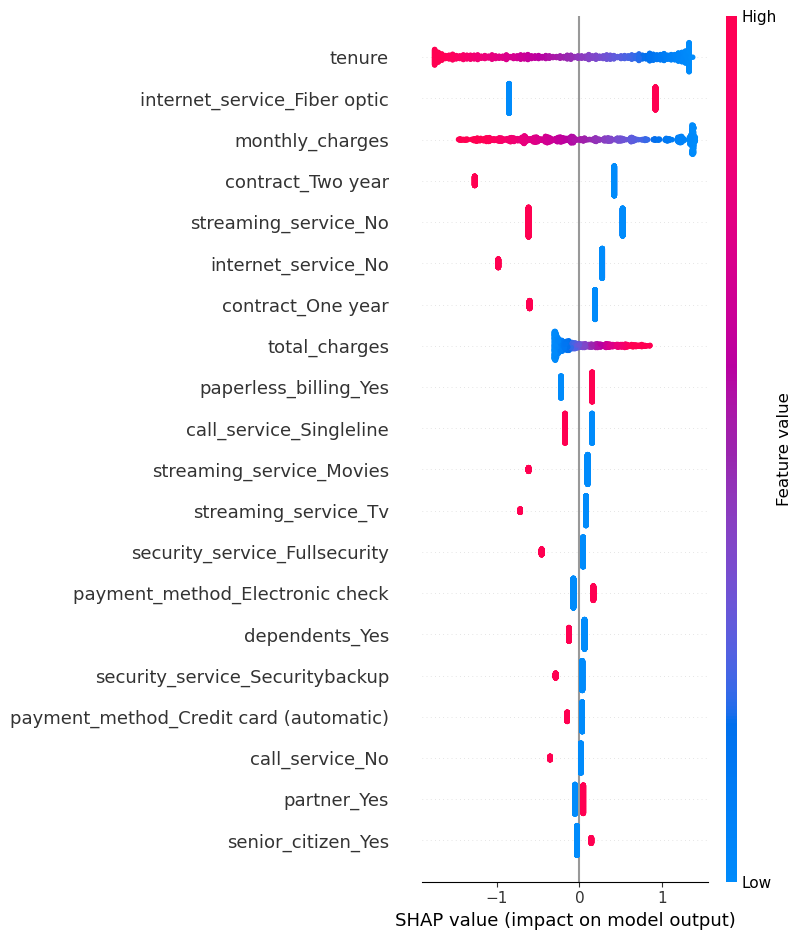

In [162]:
# Load JS visualization code to the notebook
shap.initjs()

# Create object that can calculate shap values
# explainer = shap.TreeExplainer(best_model.named_steps['classifier'])
# best_model.fit(X_train, y_train_encoded)

# Initialize KernelExplainer with the logistic regression model and background dataset
explainer = shap.Explainer(best_model.named_steps['classifier'], best_model.named_steps['preprocessor'].fit_transform(X_train))
shap_values = explainer.shap_values(best_model.named_steps['preprocessor'].transform(X_eval))

# Visualize SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, features=best_model.named_steps['preprocessor'].transform(X_eval), feature_names=feature_columns, show=False)

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values[0], columns=feature_columns)

# Melt DataFrame to long format for Plotly Express
shap_df_melted = shap_df.melt(var_name='Feature', value_name='SHAP Value')

# Create SHAP summary plot using Plotly Express
fig = px.bar(shap_df_melted, x='SHAP Value', y='Feature', orientation='h', 
             title='SHAP Summary Plot', labels={'Feature': 'Feature Name'})

# Show plot
fig.show()

In [124]:
len(X_train.columns)

19

In [163]:
from lime import lime_tabular

# Create a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(
    training_data=best_model.named_steps['preprocessor'].fit_transform(X_train),
    feature_names=X_train.columns,
    class_names=target_class,
    mode='classification'
)

# Select an instance to explain
i = 1  # Index of the instance in the test set
exp = explainer.explain_instance(best_model.named_steps['preprocessor'].transform(X_eval)[i], best_model.named_steps['classifier'].predict_proba, num_features=len(X_train.columns))

# Display the LIME explanation for the selected instance
exp.show_in_notebook(show_table=True, show_all=False)  # For Jupyter Notebooks
# exp.show_in_notebook(show_table=True, show_all=False) if you are using Jupyter Lab
# exp.as_pyplot_figure()  # To generate a matplotlib figure

# # Alternatively, to get the explanation in a data frame:
# exp_df = pd.DataFrame(exp.as_list(), columns=['Feature', 'Effect on Prediction'])
# print(exp_df)


IndexError: list index out of range

In [164]:
# Feature Importance of the Random Forest Model
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame(feature_importances, index=feature_columns)
importances_df.reset_index(inplace=True)
importances_df.rename(columns={"index": "Feature",0: "Score"}, inplace=True)
importances_df.sort_values(by="Score", ascending=False, inplace=True)

# Visualizing the feature importances
fig = px.bar(importances_df, x="Feature", y="Score")
fig.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

**The most important features for predicting churn are whether a customer has fibre optic internet service, a contract term of two years and tenure. Other features such as monthly charges, total charges, contract of one year, electronic check payment method, whethether a customer has streaming movies, tech support and online security services are also important although around half the most important features.**

#### 4.1.5 Test the best model on unknown dataset (df_test)

In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   senior_citizen     2000 non-null   int64  
 2   partner            2000 non-null   object 
 3   dependents         2000 non-null   object 
 4   tenure             2000 non-null   int64  
 5   phone_service      2000 non-null   object 
 6   multiple_lines     2000 non-null   object 
 7   internet_service   2000 non-null   object 
 8   online_security    2000 non-null   object 
 9   online_backup      2000 non-null   object 
 10  device_protection  2000 non-null   object 
 11  tech_support       2000 non-null   object 
 12  streaming_tv       2000 non-null   object 
 13  streaming_movies   2000 non-null   object 
 14  contract           2000 non-null   object 
 15  paperless_billing  2000 non-null   object 
 16  payment_method     2000 

In [169]:
predicted_churn = best_model.predict(df_test)
predicted_churn

array([1, 0, 0, ..., 0, 0, 0])

In [170]:
# Create the predicted_churn column
df_test['predicted_churn'] = encoder.inverse_transform(predicted_churn)
df_test.head()

gender  senior_citizen partner dependents  tenure phone_service  \
0   Male               0      No         No      12           Yes   
1   Male               0      No         No       9           Yes   
2   Male               0      No         No      27           Yes   
3   Male               0      No        Yes      27           Yes   
4   Male               0     Yes        Yes       1           Yes   

  multiple_lines internet_service      online_security        online_backup  \
0            Yes      Fiber optic                   No                   No   
1             No               No  No internet service  No internet service   
2             No              DSL                  Yes                   No   
3            Yes      Fiber optic                   No                   No   
4             No      Fiber optic                   No                   No   

     device_protection         tech_support         streaming_tv  \
0                   No                   No                  Yes   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

      streaming_movies        contract paperless_billing    payment_method  \
0                   No  Month-to-month               Yes  Electronic check   
1  No internet service  Month-to-month                No      Mailed check   
2                  Yes        One year                No  Electronic check   
3                   No  Month-to-month               Yes  Electronic check   
4                  Yes  Month-to-month                No      Mailed check   

   monthly_charges  total_charges predicted_churn  
0            84.45        1059.55             Yes  
1            20.40         181.80              No  
2            81.70        2212.55              No  
3            79.50        2180.55              No  
4            89.15          89.15             Yes

#### 4.1.5 Visualize the predicted churn

In [171]:
fig = px.histogram(
    df_test, x='predicted_churn', 
    title='Predicted Churn Count', 
    color='predicted_churn', 
    category_orders={'predicted_churn': target_class}
)

# # Update the layout to add count values on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='inside')

# Show the plot
fig.show()

#### Business Impact Assessment

#### Persit the model

In [118]:
import joblib
joblib.dump()

TypeError: dump() missing 2 required positional arguments: 'value' and 'filename'

Made with 💖 [Gabriel Okundaye](https://www.linkedin.com/in/dr-gabriel-okundaye)
<span style="color: #aaaaaa;">& Light ✨</span>